In [1]:
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib.colorbar import ColorbarBase
import matplotlib as m
import matplotlib.pyplot as plt
from operator import itemgetter
import pandas as pd
import geopandas as gpd
import numpy as np
import copy
import json
import seaborn as sns

In [2]:
# Summation of the value insde a dictionary
def dictsum(myDict):      
    sum = 0
    for i in myDict: 
        sum = sum + myDict[i] 
    return sum

In [3]:
# Summation of the value insde a dictionary
def dictsum_woROW(myDict):      
    sum = 0
    for i in myDict: 
        if i != 'ROW':
            sum = sum + myDict[i] 
    return sum

In [4]:
# total number of deaths caused by country i and happen in country j
file = open("pro_mort_tol.json", "r")
pro_mort_tol = file.read()
pro_mort_tol = json.loads(pro_mort_tol)

file = open("con_mort_tol.json", "r")
con_mort_tol = file.read()
con_mort_tol = json.loads(con_mort_tol)

In [5]:
print(sorted(pro_mort_tol['ROW'].items(), key=lambda item: item[1],reverse = True)[:5])

[('IND', 31436.181272697682), ('CHN', 6821.534604540688), ('BRA', 5966.795612644932), ('USA', 4807.063471169397), ('BGD', 2390.5018804692304)]


In [6]:
# Row sum: total deaths happen in that country
con_total = dict(pd.DataFrame(con_mort_tol).sum(axis = 1))
pro_total = dict(pd.DataFrame(pro_mort_tol).sum(axis = 1))

In [14]:
dictsum_woROW(con_total),dictsum_woROW(pro_total)

(3554968.6731095514, 3554968.6731089004)

In [7]:
# Col sum: total deaths caused by that country
con_caused = dict(pd.DataFrame(con_mort_tol).sum(axis = 0))
pro_caused = dict(pd.DataFrame(pro_mort_tol).sum(axis = 0))

In [8]:
dictsum(pro_caused),dictsum(con_caused)

(3557084.0529358317, 3557084.052936487)

In [9]:
dictsum(con_total),dictsum(pro_total)

(3557084.0529364827, 3557084.0529358317)

In [10]:
# TOP 5 production countries
print(sorted(pro_caused.items(), key=lambda item: item[1],reverse = True)[:10])

[('CHN', 1131190.415254747), ('IND', 549471.3341575842), ('IDN', 169334.20723176212), ('PAK', 94657.96786483776), ('JPN', 92980.88922016804), ('BRA', 86294.35666672791), ('USA', 81272.97435956787), ('ROW', 79926.66320714726), ('TUR', 75968.50729297967), ('MEX', 64386.22895572042)]


In [11]:
# TOP 5 consumption countries
print(sorted(con_caused.items(), key=lambda item: item[1],reverse = True)[:10])

[('CHN', 1023410.8300149156), ('IND', 447292.39315022324), ('USA', 230725.6868888209), ('IDN', 157906.31059919845), ('JPN', 124004.26105568584), ('PAK', 87783.73607612518), ('BRA', 82021.9045648179), ('TUR', 68288.16525195864), ('MEX', 57977.52345105536), ('RUS', 57409.160475451565)]


In [13]:
(pro_caused['PAK']+pro_caused['IND']+pro_caused['CHN']+pro_caused['IDN'])/dictsum(pro_caused)

0.5466988959408803

In [14]:
(con_total['USA']+con_total['IND']+con_total['CHN']+con_total['IDN'])/dictsum(con_total)

0.5832930214084101

### [Sequential color map](https://colorbrewer2.org/#type=sequential&scheme=OrRd&n=9)
### [ColorMap](https://www.color-hex.com/)

# Whether to indlucde ROW in our study

## Total number of deaths caused by one country and happen in the whole world

In [14]:
pro_caused['USA']

81272.97435956787

In [15]:
pro_world = {}
for i in pro_mort_tol:
    pro_world[i] = dictsum(pro_mort_tol[i])
print("Total number of worldwide deaths caused by each country's production (with ROW)",sorted(pro_world.items(), key=lambda item: item[1],reverse = True)[:10])

Total number of worldwide deaths caused by each country's production (with ROW) [('CHN', 1131190.415254747), ('IND', 549471.3341575842), ('IDN', 169334.20723176212), ('PAK', 94657.96786483776), ('JPN', 92980.88922016804), ('BRA', 86294.35666672791), ('USA', 81272.97435956787), ('ROW', 79926.66320714726), ('TUR', 75968.50729297967), ('MEX', 64386.22895572042)]


In [16]:
dictsum(pro_world)

3557084.0529358317

In [17]:
pro_world_woROW = {}
for i in pro_mort_tol:
    pro_world_woROW[i] = dictsum_woROW(pro_mort_tol[i])
print("Total number of worldwide deaths caused by each country's production (without ROW)",sorted(pro_world_woROW.items(), key=lambda item: item[1],reverse = True)[:10])

Total number of worldwide deaths caused by each country's production (without ROW) [('CHN', 1131190.3684516135), ('IND', 549467.9951704921), ('IDN', 169308.79843615092), ('PAK', 94656.88078849515), ('JPN', 92980.88093104868), ('BRA', 86294.10991682079), ('USA', 81266.88902431294), ('ROW', 78691.91225701968), ('TUR', 75902.06809456836), ('MEX', 64385.6986398347)]


In [18]:
con_world = {}
for i in con_mort_tol:
    con_world[i] = dictsum(con_mort_tol[i])
print("Total number of worldwide deaths caused by each country's consumption (with ROW)",sorted(con_world.items(), key=lambda item: item[1],reverse = True)[:10])

Total number of worldwide deaths caused by each country's consumption (with ROW) [('CHN', 1023410.8300149156), ('IND', 447292.39315022324), ('USA', 230725.6868888209), ('IDN', 157906.31059919845), ('JPN', 124004.26105568584), ('PAK', 87783.73607612518), ('BRA', 82021.9045648179), ('TUR', 68288.16525195864), ('MEX', 57977.52345105536), ('RUS', 57409.160475451565)]


In [19]:
pro_world_woROW = {}
for i in con_mort_tol:
    pro_world_woROW[i] = dictsum_woROW(con_mort_tol[i])
print("Total number of worldwide deaths caused by each country's production (without ROW)",sorted(pro_world_woROW.items(), key=lambda item: item[1],reverse = True)[:10])

Total number of worldwide deaths caused by each country's production (without ROW) [('CHN', 1023128.1324286667), ('IND', 447262.6433576702), ('USA', 230587.4770805716), ('IDN', 157861.5368298754), ('JPN', 123871.47042144617), ('PAK', 87777.14055320022), ('BRA', 82009.59974795616), ('TUR', 68226.44533662684), ('MEX', 57954.21545892648), ('RUS', 57383.268203483414)]


## Top 5 countries causing the most deaths due to consumptions

In [20]:
print(sorted(con_mort_tol['CHN'].items(), key=lambda item: item[1],reverse = True)[:10])

[('CHN', 901638.5012119366), ('IND', 22044.487236805842), ('JPN', 16239.203604685556), ('PRK', 9021.727002974709), ('VNM', 8590.934058623085), ('KOR', 8194.57566139892), ('IDN', 4857.853885568209), ('RUS', 3939.1110583193868), ('THA', 3832.264545313928), ('HKG', 2951.5151266111784)]


In [21]:
print(sorted(con_mort_tol['IND'].items(), key=lambda item: item[1],reverse = True)[:10])

[('IND', 343509.87443913124), ('CHN', 43886.56736554672), ('BGD', 28091.156152441432), ('NPL', 7432.655966792341), ('PAK', 5231.686580354879), ('MMR', 3498.4547146741925), ('THA', 1703.1101125731846), ('VNM', 1564.8138714045501), ('LKA', 1438.3819692203786), ('IDN', 1273.0125517810181)]


In [22]:
print(sorted(con_mort_tol['USA'].items(), key=lambda item: item[1],reverse = True)[:10])

[('USA', 67270.70390796567), ('CHN', 60142.41435188019), ('IND', 24212.714361282), ('MEX', 13449.914061937312), ('JPN', 6317.107482629432), ('BRA', 3599.9331885151014), ('THA', 3527.6056380281107), ('IDN', 3396.9294509123165), ('CAN', 3256.281231534317), ('BGD', 2935.2385610792785)]


In [23]:
print(sorted(con_mort_tol['JPN'].items(), key=lambda item: item[1],reverse = True)[:10])

[('JPN', 67557.5300672536), ('CHN', 19674.351604599822), ('IND', 8602.89726525665), ('VNM', 2817.514241084012), ('IDN', 1669.3533685079096), ('THA', 1276.9749911743475), ('USA', 1077.854858291315), ('RUS', 1056.5832853508186), ('ROU', 1000.589696147845), ('BGD', 969.0374891406777)]


In [24]:
print(sorted(con_mort_tol['IDN'].items(), key=lambda item: item[1],reverse = True)[:10])

[('IDN', 144062.046333486), ('CHN', 5304.826723814528), ('IND', 2062.5297312847465), ('MYS', 1131.6357814604796), ('VNM', 1008.5906165507383), ('THA', 543.9478152179443), ('JPN', 380.7326699621443), ('SGP', 324.66190494489854), ('BGD', 285.82656683394544), ('USA', 185.6060795805125)]


## Top 5 countries causing the most deaths due to productions

In [25]:
print(sorted(pro_mort_tol['CHN'].items(), key=lambda item: item[1],reverse = True)[:10])

[('CHN', 1085827.068418561), ('JPN', 11710.611727774694), ('PRK', 10525.766369924999), ('KOR', 7033.19486519508), ('VNM', 4968.251215601184), ('HKG', 2927.530583761419), ('IND', 2497.9753027859133), ('TWN', 1472.801048291064), ('RUS', 1192.181933929213), ('BGD', 632.180514926584)]


In [26]:
print(sorted(pro_mort_tol['IND'].items(), key=lambda item: item[1],reverse = True)[:10])

[('IND', 440168.0339125105), ('CHN', 45168.305144739665), ('BGD', 36087.439092356784), ('NPL', 9284.260453980021), ('PAK', 6068.457018203614), ('MMR', 4349.693093180723), ('LKA', 1701.977710577977), ('VNM', 1460.5852754163818), ('THA', 1437.005189628174), ('JPN', 608.9158122903681)]


In [27]:
print(sorted(pro_mort_tol['ROW'].items(), key=lambda item: item[1],reverse = True)[:10])

[('IND', 31436.181272697682), ('CHN', 6821.534604540688), ('BRA', 5966.795612644932), ('USA', 4807.063471169397), ('BGD', 2390.5018804692304), ('ESP', 2141.655470752635), ('DEU', 1571.6584586346964), ('ITA', 1397.2593125496426), ('ROW', 1234.7509501275795), ('GBR', 1077.3793603086585)]


In [28]:
print(sorted(pro_mort_tol['USA'].items(), key=lambda item: item[1],reverse = True)[:10])

[('USA', 74960.52773589648), ('CAN', 2205.733370210451), ('MEX', 1087.107479221745), ('CHN', 337.35158497044773), ('DEU', 305.05860608653313), ('RUS', 210.60180742613474), ('ITA', 190.76168076441894), ('UKR', 172.97902907109642), ('ROU', 143.76592703220535), ('POL', 135.19104219893677)]


In [29]:
print(sorted(pro_mort_tol['IDN'].items(), key=lambda item: item[1],reverse = True)[:10])

[('IDN', 164289.4343711159), ('CHN', 2160.4090883204212), ('MYS', 1126.1610268965637), ('VNM', 527.6596975182647), ('SGP', 312.32289160769307), ('IND', 266.9359890034731), ('THA', 201.82728962429718), ('BGD', 125.01742139377225), ('KHM', 67.82381117307247), ('MMR', 62.20799814976739)]


# Trail plots

In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(30,10)
mpl.style.use('ggplot')

In [62]:
import cartopy.crs as ccrs
import cartopy.feature as cf
from matplotlib import pyplot as plt
import cartopy

In [17]:
df_shp = gpd.read_file('/mnt/c/Users/Shiyuan Wang/Desktop/natural_earth_vector/10m_cultural/ne_10m_admin_0_countries.shp')

In [18]:
consumption_concentration = pd.read_csv('/mnt/c/Users/Shiyuan Wang/Desktop/new_results/concentration_matrix_new.csv')

In [19]:
consumption_concentration

,Unnamed: 0,AFG,ALB,DZA,AND,AGO,ATG,ARG,ARM,ABW,...,USA,URY,UZB,VUT,VEN,VNM,YEM,ZMB,ZWE,ROW
0,0,9.920484e-09,6.744790e-09,5.660641e-07,4.770913e-09,4.247910e-07,3.428787e-09,0.000005,7.354148e-09,1.858279e-09,...,0.000006,1.645413e-07,1.361577e-07,8.218591e-10,0.000006,8.420770e-08,8.136300e-08,1.078372e-07,5.630211e-08,0.0
1,1,1.106292e-08,7.399464e-09,7.051958e-07,5.760377e-09,4.380194e-07,3.057016e-09,0.000004,8.019294e-09,1.865970e-09,...,0.000006,1.084878e-07,1.693102e-07,7.841343e-10,0.000006,1.005363e-07,8.710439e-08,7.603341e-08,3.683779e-08,0.0
2,2,1.583179e-08,1.031067e-08,1.147740e-06,9.074007e-09,5.868084e-07,2.128728e-09,0.000003,1.058245e-08,2.163303e-09,...,0.000009,6.294550e-08,2.758541e-07,8.766230e-10,0.000009,1.565125e-07,1.152683e-07,5.677968e-08,2.436753e-08,0.0
3,3,1.527371e-08,9.921154e-09,1.132081e-06,8.898310e-09,5.583823e-07,1.809570e-09,0.000002,1.007609e-08,2.005387e-09,...,0.000009,4.229055e-08,2.718389e-07,8.063311e-10,0.000008,1.531916e-07,1.110536e-07,4.486365e-08,1.817903e-08,0.0
4,4,3.584923e-08,2.312106e-08,2.729995e-06,2.132199e-08,1.294545e-06,2.825948e-09,0.000003,2.303371e-08,4.408968e-09,...,0.000020,6.469574e-08,6.559155e-07,1.762122e-09,0.000019,3.663224e-07,2.549466e-07,8.448403e-08,3.229897e-08,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273734,273734,1.137782e-04,5.194176e-05,3.369770e-03,3.140167e-05,1.510668e-03,7.361319e-06,0.003768,5.261772e-05,1.403779e-05,...,0.055754,1.457122e-04,8.489244e-04,5.969808e-05,0.021846,2.170282e-03,3.909432e-04,1.865970e-04,9.886373e-05,0.0
273735,273735,3.099506e-04,1.438547e-04,9.490727e-03,8.884870e-05,4.261378e-03,2.004188e-05,0.010505,1.448372e-04,3.838136e-05,...,0.151954,3.474790e-04,2.414059e-03,1.571192e-04,0.062230,5.759545e-03,1.046273e-03,4.446571e-04,2.114392e-04,0.0
273736,273736,4.158513e-04,1.905795e-04,1.214493e-02,1.152015e-04,5.429660e-03,2.707684e-05,0.013433,1.917122e-04,5.147421e-05,...,0.201721,4.567140e-04,3.101185e-03,2.159967e-04,0.079421,7.827244e-03,1.357214e-03,5.804878e-04,2.748950e-04,0.0
273737,273737,5.065489e-04,2.310026e-04,1.455606e-02,1.386409e-04,6.494269e-03,3.304003e-05,0.016083,2.320527e-04,6.261112e-05,...,0.243833,5.516694e-04,3.720036e-03,2.652378e-04,0.095103,9.563852e-03,1.634766e-03,6.990218e-04,3.288931e-04,0.0


In [20]:
consumption_concentration.sum()[1:].sum()

2655101.199056261

In [21]:
production_concentration = pd.read_csv('/mnt/c/Users/Shiyuan Wang/Desktop/new_results/Production_concentrations.csv')

In [22]:
production_concentration

,Unnamed: 0,AFG,ALB,DZA,AND,AGO,ATG,ARG,ARM,ABW,...,USA,URY,UZB,VUT,VEN,VNM,YEM,ZMB,ZWE,ROW
0,0,9.480918e-16,4.588586e-11,1.438521e-08,3.997877e-13,2.344238e-07,4.445239e-09,5.425069e-06,1.286004e-14,2.123373e-10,...,1.838655e-07,1.799424e-07,4.066890e-16,2.595015e-13,1.787138e-06,1.615147e-15,3.245923e-08,1.437252e-07,5.147880e-08,0.000046
1,1,5.465571e-16,3.587504e-11,1.161818e-08,3.196108e-13,1.634174e-07,3.835323e-09,3.580174e-06,8.812571e-15,1.833627e-10,...,1.627805e-07,1.080930e-07,2.451437e-16,1.152322e-13,1.535348e-06,5.206475e-16,2.546461e-08,8.992293e-08,3.029862e-08,0.000058
2,2,3.967431e-16,2.053636e-11,6.270234e-09,1.802445e-13,7.812796e-08,2.081952e-09,1.586276e-06,5.677446e-15,9.784364e-11,...,9.123313e-08,4.485338e-08,1.945965e-16,3.796897e-14,8.164731e-07,1.321572e-16,1.318851e-08,3.992352e-08,1.284355e-08,0.000097
3,3,1.142983e-15,2.446616e-11,5.637355e-09,1.974006e-13,4.784291e-08,1.664499e-09,8.019430e-07,1.104181e-14,6.994620e-11,...,7.885440e-08,2.142788e-08,6.114549e-16,1.447401e-14,5.727979e-07,5.044041e-17,1.031816e-08,2.183222e-08,6.692237e-09,0.000096
4,4,4.110235e-15,4.282498e-11,7.157085e-09,3.170579e-13,3.444896e-08,1.726208e-09,4.021702e-07,2.973163e-14,6.036085e-11,...,9.114860e-08,1.055035e-08,2.305547e-15,6.277625e-15,4.772256e-07,6.544257e-17,1.104691e-08,1.358664e-08,4.199159e-09,0.000232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273734,273734,6.315881e-08,4.962663e-08,2.020814e-06,1.931469e-10,1.703577e-05,1.411109e-08,1.307201e-04,4.132773e-09,8.170558e-10,...,6.520772e-07,1.249769e-05,4.616715e-08,1.543583e-05,7.630457e-06,5.724461e-06,1.011428e-05,2.949572e-05,2.217016e-05,0.249555
273735,273735,2.606983e-08,1.992277e-08,7.923015e-07,7.774215e-11,7.330135e-06,5.153441e-09,5.316199e-05,1.772816e-09,3.074150e-10,...,2.432796e-07,5.338985e-06,1.916369e-08,1.290810e-05,2.885264e-06,2.399208e-06,4.073397e-06,1.390152e-05,1.002120e-05,0.718262
273736,273736,2.188429e-08,1.672866e-08,6.656873e-07,6.527398e-11,6.155379e-06,4.327735e-09,4.464029e-05,1.487180e-09,2.583521e-10,...,2.040621e-07,4.480358e-06,1.607684e-08,1.100399e-05,2.425512e-06,2.018291e-06,3.427066e-06,1.164189e-05,8.404347e-06,0.909678
273737,273737,1.702976e-08,1.312494e-08,5.147212e-07,5.116893e-11,4.698759e-06,3.340507e-09,3.537284e-05,1.184876e-09,2.004520e-10,...,1.577110e-07,3.620119e-06,1.260223e-08,9.452868e-06,1.875059e-06,1.561028e-06,2.658189e-06,9.432670e-06,6.708574e-06,1.085991


In [23]:
production_concentration.sum()[1:].sum()

2655101.1990557485

In [24]:
consumption_concentration.sum()[1:].sum()

2655101.199056261

In [35]:
wholeworld = gpd.read_file('/mnt/c/Users/Shiyuan Wang/Desktop/new_results/output_wholeworld/wholeworld_bio.shp')
wholeworld = gpd.GeoDataFrame(wholeworld)

In [36]:
# 那些 latitude longtitude不会变，不用再重新算一次！
# wholeworld = pd.read_csv('wholeworld_all_points2.csv')
# wholeworld = gpd.GeoDataFrame(wholeworld)

In [37]:
wholeworld['CHN_pro'] = production_concentration['CHN']
wholeworld['IND_pro'] = production_concentration['IND']
wholeworld['IDN_pro'] = production_concentration['IDN']
wholeworld['ROW_pro'] = production_concentration['ROW']
wholeworld['PAK_pro'] = production_concentration['PAK']
wholeworld['JPN_pro'] = production_concentration['JPN']
wholeworld['BRA_pro'] = production_concentration['BRA']
wholeworld['USA_pro'] = production_concentration['USA']

In [38]:
wholeworld['CHN_con'] = consumption_concentration['CHN']
wholeworld['IND_con'] = consumption_concentration['IND']
wholeworld['USA_con'] = consumption_concentration['USA']
wholeworld['IDN_con'] = consumption_concentration['IDN']
wholeworld['JPN_con'] = consumption_concentration['JPN']
wholeworld['PAK_con'] = consumption_concentration['PAK']
wholeworld['BRA_con'] = consumption_concentration['BRA']

In [69]:
# wholeworld.to_csv('wholeworld_all_points2.csv')

### Convert polygons to points

1. length average concentration along with the center points; kde with smoothness: US (8miug/m^3,Asia:20miug/m^3)
2. color: continuous for first 90th perentile, a dark color for the last 10th percentile. Plot out the discoutinuity color bar.
3. Change ROW to a different color.

<img src="length_average.jpg" width="50%">

## Convert to ratser or Option 2

In [49]:
from shapely.geometry import Point, LineString

In [52]:
str(wholeworld.loc[0,'geometry'])

'POLYGON ((-180 -88, -175 -88, -175 -84, -180 -84, -180 -88))'

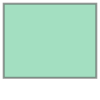

In [53]:
wholeworld.loc[0,'geometry']

In [54]:
#trail
poly = wholeworld.loc[0,'geometry']
b = poly.boundary.coords
left = abs(list(b)[0][0])
right = abs(list(b)[1][0])
longtitude_length = abs(left-right)
up = abs(list(b)[0][1])
down = abs(list(b)[2][1])
latitude_length = abs(up-down)
longtitude_length,latitude_length

(5.0, 4.0)

### calculate the side length of each rectangle

In [55]:
def lon_length(poly):
    b = poly.boundary.coords
    left = abs(list(b)[0][0])
    right = abs(list(b)[1][0])
    longtitude_length = abs(left-right)
    return (longtitude_length)

def lat_length(poly):
    b = poly.boundary.coords
    up = abs(list(b)[0][1])
    down = abs(list(b)[2][1])
    latitude_length = abs(up-down)
    return (latitude_length)

In [56]:
def left(poly):
    b = poly.boundary.coords
    left = list(b)[0][0]
    return left
def right(poly):
    b = poly.boundary.coords
    right = list(b)[1][0]
    return right
def down(poly):
    b = poly.boundary.coords
    down = list(b)[0][1]
    return down
def up(poly):
    b = poly.boundary.coords
    up = list(b)[2][1]
    return up

In [57]:
i = 122000
left(wholeworld.loc[i,'geometry']),right(wholeworld.loc[i,'geometry']),up(wholeworld.loc[i,'geometry']),down(wholeworld.loc[i,'geometry'])

(35.78125, 35.9375, 33.5, 33.375)

In [58]:
wholeworld['longtitude_length'] = wholeworld['geometry'].map(lon_length)
wholeworld['latitude_length'] = wholeworld['geometry'].map(lat_length)

wholeworld['left'] = wholeworld['geometry'].map(left)
wholeworld['right'] = wholeworld['geometry'].map(right)
wholeworld['up'] = wholeworld['geometry'].map(up)
wholeworld['down'] = wholeworld['geometry'].map(down)

In [59]:
wholeworld['points'] = wholeworld['geometry'].centroid

C:\Users\15311\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [60]:
def point_lon(x):
    return float(str(x).split()[1].split('(')[1])
def point_lat(x):
    return float(str(x).split()[2].split(')')[0])
wholeworld['center_longtitude'] = wholeworld['points'].map(point_lon)
wholeworld['center_latitude'] = wholeworld['points'].map(point_lat)

In [71]:
wholeworld['TotalPM25'].max()

176.27353551459893

## calculate length average concentrations using option 1

In [62]:
# trail
A = {1:{'CHN':10,'CAN':20},2:{'CHN':50,'CAN':30}}
pd.DataFrame(A).T

,CHN,CAN
1,10,20
2,50,30


## Save wholeworld for future use, and upload it to cc, run length_average_concentration.py

In [63]:
wholeworld.to_csv('wholeworld_all_points2.csv')

-----

# Run the following two cells in cc

In [100]:
all_long_points = wholeworld.center_longtitude.unique()
all_lat_points = wholeworld.center_latitude.unique()

In [101]:
long_df = {}
lat_df = {}
for i in ['CHN_pro','USA_pro','IND_pro','ROW_pro','IDN_pro','CHN_con','USA_con','IND_con','JPN_con','IDN_con']:
    long_df[i] = {}
    lat_df[i] = {}

In [102]:
from tqdm import tqdm
for point_lon in tqdm(all_long_points[:10]): # 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000
    length = 0
    CHN_pro = 0
    USA_pro = 0
    IND_pro = 0
    ROW_pro = 0
    IDN_pro = 0
    
    CHN_con = 0
    USA_con = 0
    IND_con = 0
    JPN_con = 0
    IDN_con = 0
    for i in range(len(wholeworld)):
        if wholeworld.loc[i,'left'] <= point_lon and wholeworld.loc[i,'right'] > point_lon:
            length += wholeworld.loc[i,'latitude_length']
            CHN_pro +=  wholeworld.loc[i,'latitude_length'] * wholeworld.loc[i,'CHN_pro']
            USA_pro +=  wholeworld.loc[i,'latitude_length'] * wholeworld.loc[i,'USA_pro']
            IND_pro +=  wholeworld.loc[i,'latitude_length'] * wholeworld.loc[i,'IND_pro']
            ROW_pro +=  wholeworld.loc[i,'latitude_length'] * wholeworld.loc[i,'ROW_pro']
            IDN_pro +=  wholeworld.loc[i,'latitude_length'] * wholeworld.loc[i,'IDN_pro']
            
            CHN_con +=  wholeworld.loc[i,'latitude_length'] * wholeworld.loc[i,'CHN_con']
            USA_con +=  wholeworld.loc[i,'latitude_length'] * wholeworld.loc[i,'USA_con']
            IND_con +=  wholeworld.loc[i,'latitude_length'] * wholeworld.loc[i,'IND_con']
            JPN_con +=  wholeworld.loc[i,'latitude_length'] * wholeworld.loc[i,'JPN_con']
            IDN_con +=  wholeworld.loc[i,'latitude_length'] * wholeworld.loc[i,'IDN_con']
    long_df['CHN_pro'][point_lon]  = CHN_pro/length
    long_df['USA_pro'][point_lon]  = USA_pro/length
    long_df['IND_pro'][point_lon]  = IND_pro/length
    long_df['ROW_pro'][point_lon]  = ROW_pro/length
    long_df['IDN_pro'][point_lon]  = IDN_pro/length
    
    long_df['CHN_con'][point_lon]  = CHN_con/length
    long_df['USA_con'][point_lon]  = USA_con/length
    long_df['IND_con'][point_lon]  = IND_con/length
    long_df['JPN_con'][point_lon]  = JPN_con/length
    long_df['IDN_con'][point_lon]  = IDN_con/length

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:25<00:00,  2.53s/it]


In [103]:
wholeworld

,AllCause,BasePM25,NH3,NOx,PNH4,PNO3,PSO4,SOA,SOx,TotalPM25,...,IDN_con,longtitude_length,latitude_length,left,right,up,down,points,center_longtitude,center_latitude
0,0.0,0.426418,3.316920e-08,0.000026,3.835537e-07,0.000031,6.226768e-08,0.000055,6.966243e-31,0.000094,...,0.000004,5.000000,4.0000,-180.000000,-175.0,-84.0000,-88.0000,POINT (-177.50000 -86.00000),-177.500000,-86.00000
1,0.0,0.508265,2.956050e-08,0.000018,2.686768e-07,0.000023,4.373582e-08,0.000035,4.418886e-32,0.000064,...,0.000005,5.000000,4.0000,-180.000000,-175.0,-80.0000,-84.0000,POINT (-177.50000 -82.00000),-177.500000,-82.00000
2,0.0,0.550982,1.284192e-08,0.000008,1.226300e-07,0.000011,1.945994e-08,0.000016,3.906132e-33,0.000030,...,0.000008,5.000000,4.0000,-180.000000,-175.0,-76.0000,-80.0000,POINT (-177.50000 -78.00000),-177.500000,-78.00000
3,0.0,0.680774,1.098556e-08,0.000005,6.034586e-08,0.000007,9.650949e-09,0.000009,2.494349e-32,0.000018,...,0.000008,5.000000,4.0000,-180.000000,-175.0,-72.0000,-76.0000,POINT (-177.50000 -74.00000),-177.500000,-74.00000
4,0.0,1.058635,7.086690e-09,0.000003,3.009428e-08,0.000006,4.475599e-09,0.000005,4.925545e-33,0.000011,...,0.000019,5.000000,4.0000,-180.000000,-175.0,-68.0000,-72.0000,POINT (-177.50000 -70.00000),-177.500000,-70.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273734,0.0,2.168654,7.947285e-04,0.047907,1.875811e-04,0.011319,4.246912e-04,0.034175,2.018801e-04,0.068489,...,0.035439,0.078125,0.0625,174.921875,175.0,-41.1250,-41.1875,POINT (174.96094 -41.15625),174.960938,-41.15625
273735,0.0,2.589360,3.040639e-04,0.029231,7.888282e-05,0.004807,1.920463e-04,0.040697,6.116166e-06,0.057297,...,0.099343,0.078125,0.0625,174.921875,175.0,-37.0625,-37.1250,POINT (174.96094 -37.09375),174.960938,-37.09375
273736,0.0,2.589360,2.915851e-04,0.031871,7.564546e-05,0.005241,1.668708e-04,0.036010,1.845838e-05,0.051402,...,0.129111,0.078125,0.0625,174.921875,175.0,-37.0000,-37.0625,POINT (174.96094 -37.03125),174.960938,-37.03125
273737,0.0,2.423264,3.969634e-04,0.039902,9.294622e-05,0.005442,1.520888e-04,0.031096,7.500343e-05,0.046619,...,0.155271,0.078125,0.0625,174.921875,175.0,-36.9375,-37.0000,POINT (174.96094 -36.96875),174.960938,-36.96875


In [105]:
for point_lat in tqdm(all_lat_points): 
    length = 0
    CHN_pro = 0
    USA_pro = 0
    IND_pro = 0
    ROW_pro = 0
    IDN_pro = 0
    
    CHN_con = 0
    USA_con = 0
    IND_con = 0
    JPN_con = 0
    IDN_con = 0
    for i in range(len(wholeworld)):
        if wholeworld.loc[i,'down'] <= point_lat and wholeworld.loc[i,'up'] > point_lat:
            length += wholeworld.loc[i,'longtitude_length']
            CHN_pro +=  wholeworld.loc[i,'longtitude_length'] * wholeworld.loc[i,'CHN_pro']
            USA_pro +=  wholeworld.loc[i,'longtitude_length'] * wholeworld.loc[i,'USA_pro']
            IND_pro +=  wholeworld.loc[i,'longtitude_length'] * wholeworld.loc[i,'IND_pro']
            ROW_pro +=  wholeworld.loc[i,'longtitude_length'] * wholeworld.loc[i,'ROW_pro']
            IDN_pro +=  wholeworld.loc[i,'longtitude_length'] * wholeworld.loc[i,'IDN_pro']
            
            CHN_con +=  wholeworld.loc[i,'longtitude_length'] * wholeworld.loc[i,'CHN_con']
            USA_con +=  wholeworld.loc[i,'longtitude_length'] * wholeworld.loc[i,'USA_con']
            IND_con +=  wholeworld.loc[i,'longtitude_length'] * wholeworld.loc[i,'IND_con']
            JPN_con +=  wholeworld.loc[i,'longtitude_length'] * wholeworld.loc[i,'JPN_con']
            IDN_con +=  wholeworld.loc[i,'longtitude_length'] * wholeworld.loc[i,'IDN_con']
    lat_df['CHN_pro'][point_lat]  = CHN_pro/length
    lat_df['USA_pro'][point_lat]  = USA_pro/length
    lat_df['IND_pro'][point_lat]  = IND_pro/length
    lat_df['ROW_pro'][point_lat]  = ROW_pro/length
    lat_df['IDN_pro'][point_lat]  = IDN_pro/length
    
    lat_df['CHN_con'][point_lat]  = CHN_con/length
    lat_df['USA_con'][point_lat]  = USA_con/length
    lat_df['IND_con'][point_lat]  = IND_con/length
    lat_df['JPN_con'][point_lat]  = JPN_con/length
    lat_df['IDN_con'][point_lat]  = IDN_con/length

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:24<00:00,  2.42s/it]


In [108]:
pd.DataFrame(long_df).to_csv('longtitude_df_trail.csv')
pd.DataFrame(lat_df).to_csv('latitude_df_trail.csv')

In [109]:
a = pd.read_csv('wholeworld_all_points.csv')
b = pd.read_csv('longtitude_df_trail.csv')
c = pd.read_csv('latitude_df_trail.csv')

In [113]:
b

,Unnamed: 0,CHN_pro,USA_pro,IND_pro,ROW_pro,IDN_pro,CHN_con,USA_con,IND_con,JPN_con,IDN_con
0,-177.500000,4.523968e-13,0.021820,1.890306e-07,0.341157,5.012353e-08,0.071294,0.050935,0.006179,0.031368,0.005586
1,-173.750000,8.959507e-13,0.037531,3.232348e-07,0.469572,8.469731e-08,0.098428,0.077321,0.008565,0.043373,0.007706
2,-172.500000,9.118053e-13,0.037569,3.293904e-07,0.468354,8.642512e-08,0.098246,0.077328,0.008554,0.043429,0.007692
3,-172.187500,9.118053e-13,0.037569,3.293904e-07,0.468354,8.642512e-08,0.098246,0.077328,0.008554,0.043429,0.007692
4,-171.875000,9.131098e-13,0.037570,3.297422e-07,0.468257,8.651924e-08,0.098238,0.077330,0.008555,0.043455,0.007691
5,-171.796875,9.131098e-13,0.037570,3.297422e-07,0.468257,8.651924e-08,0.098238,0.077330,0.008555,0.043455,0.007691
6,-171.718750,9.132459e-13,0.037570,3.297797e-07,0.468251,8.652927e-08,0.098206,0.077303,0.008550,0.043372,0.007689
7,-171.640625,9.132459e-13,0.037570,3.297797e-07,0.468251,8.652927e-08,0.098206,0.077303,0.008550,0.043372,0.007689
8,-171.562500,9.137231e-13,0.037571,3.299209e-07,0.468241,8.656747e-08,0.098175,0.077278,0.008545,0.043293,0.007687
9,-171.406250,9.137231e-13,0.037571,3.299209e-07,0.468241,8.656747e-08,0.098175,0.077278,0.008545,0.043293,0.007687


In [114]:
c

,Unnamed: 0,CHN_pro,USA_pro,IND_pro,ROW_pro,IDN_pro,CHN_con,USA_con,IND_con,JPN_con,IDN_con
0,-86.0,6.277258e-10,0.000002,4.664995e-07,0.002031,0.000003,0.000583,0.000381,0.000076,0.000284,0.000045
1,-82.0,6.427773e-09,0.000008,2.493263e-06,0.004808,0.000013,0.001396,0.000918,0.000186,0.000681,0.000112
2,-78.0,3.775780e-08,0.000017,8.930745e-06,0.009120,0.000037,0.002649,0.001729,0.000363,0.001289,0.000226
3,-74.0,1.621695e-07,0.000034,2.410905e-05,0.016181,0.000087,0.004664,0.002996,0.000648,0.002256,0.000423
4,-70.0,6.055488e-07,0.000066,6.170898e-05,0.034509,0.000197,0.009597,0.005934,0.001303,0.004573,0.000894
5,-66.0,1.988138e-06,0.000125,1.515497e-04,0.064726,0.000420,0.017826,0.010864,0.002451,0.008427,0.001718
6,-62.0,4.157345e-06,0.000204,2.595690e-04,0.087630,0.000624,0.024451,0.015285,0.003457,0.011539,0.002395
7,-58.0,6.660613e-06,0.000285,3.539104e-04,0.108660,0.000779,0.030694,0.019624,0.004394,0.014466,0.003009
8,-54.0,1.063389e-05,0.000360,4.860575e-04,0.143440,0.001029,0.040648,0.026181,0.005812,0.019111,0.004011
9,-50.0,1.679605e-05,0.000431,6.721466e-04,0.194056,0.001407,0.054857,0.033893,0.007816,0.025510,0.005479


In [72]:
# file=open("long_df.json",'w')
# json.dump(long_df,file)
# file.close()

-----

## calculate length average concentrations using option 2

In [234]:
wholeworld_new = wholeworld[['CHN_pro','USA_pro','IND_pro','ROW_pro','IDN_pro','CHN_con','USA_con','IND_con','JPN_con','IDN_con','longtitude_length','latitude_length','longtitude','latitude']]

In [303]:
from tqdm import tqdm
def lat_average(df,col_name):
    return (df[col_name] * df['longtitude_length'])

latitude_df = pd.DataFrame({'latitude':wholeworld_new['latitude'].unique()}).set_index('latitude')
latitude_df['longtitude_length'] = wholeworld_new.groupby('latitude')[['longtitude_length']].sum()['longtitude_length']

for col in tqdm(['CHN_pro','USA_pro','IND_pro','ROW_pro','IDN_pro','CHN_con','USA_con','IND_con','JPN_con','IDN_con']):
    a = wholeworld_new.groupby('latitude').apply(lambda df: lat_average(df,col))
    a = pd.DataFrame(a).groupby('latitude').sum()
    
    latitude_df = latitude_df.merge(a,on='latitude')
    
    latitude_df.rename(columns={0:col},inplace=True)
    
    latitude_df[col] = latitude_df[col] / latitude_df['longtitude_length']

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.90s/it]


In [304]:
def lon_average(df,col_name):
    return (df[col_name] * df['latitude_length'])

longtitude_df = pd.DataFrame({'longtitude':wholeworld_new['longtitude'].unique()}).set_index('longtitude')
longtitude_df['latitude_length'] = wholeworld_new.groupby('longtitude')[['latitude_length']].sum()['latitude_length']

for col in tqdm(['CHN_pro','USA_pro','IND_pro','ROW_pro','IDN_pro','CHN_con','USA_con','IND_con','JPN_con','IDN_con']):
    a = wholeworld_new.groupby('longtitude').apply(lambda df: lon_average(df,col))
    a = pd.DataFrame(a).groupby('longtitude').sum()
    
    longtitude_df = longtitude_df.merge(a,on='longtitude')
    
    longtitude_df.rename(columns={0:col},inplace=True)
    
    longtitude_df[col] = longtitude_df[col] / longtitude_df['latitude_length']

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:02<00:00,  6.22s/it]


In [110]:
# longitude_df = wholeworld.groupby('longitude')[['CHN_pro','USA_pro','IND_pro','ROW_pro','IDN_pro','CHN_con','USA_con','IND_con','JPN_con','IDN_con']].mean()
# latitude_df = wholeworld.groupby('latitude')[['CHN_pro','USA_pro','IND_pro','ROW_pro','IDN_pro','CHN_con','USA_con','IND_con','JPN_con','IDN_con']].mean()

In [307]:
longtitude_df['CHN_pro'].max()

213.28045244148575

In [310]:
latitude_df['CHN_pro'].max()

118.09358874772715

## Plotting

In [29]:
longtitude_df = pd.read_csv('/mnt/c/Users/Shiyuan Wang/Desktop/new_results/longtitude_df.csv')
latitude_df = pd.read_csv('/mnt/c/Users/Shiyuan Wang/Desktop/new_results/latitude_df.csv')

In [30]:
longitude_pro = longtitude_df[['Unnamed: 0','CHN_pro','IND_pro','IDN_pro','PAK_pro','JPN_pro']]
longitude_pro.columns = ['long','China','India','Indonesia','Pakistan','Japan']
latitude_pro = latitude_df[['Unnamed: 0','CHN_pro','IND_pro','IDN_pro','PAK_pro','JPN_pro']]
latitude_pro.columns = ['lat','China','India','Indonesia','Pakistan','Japan']
longitude_pro = longitude_pro.sort_values('long')
latitude_pro = latitude_pro.sort_values('lat')


longitude_con = longtitude_df[['Unnamed: 0','CHN_con','IND_con','USA_con','IDN_con','JPN_con']]
longitude_con.columns = ['long','China','India','United States','Indonesia','Japan']
latitude_con = latitude_df[['Unnamed: 0','CHN_con','IND_con','USA_con','IDN_con','JPN_con']]
latitude_con.columns = ['lat','China','India','United States','Indonesia','Japan']
longitude_con = longitude_con.sort_values('long')
latitude_con = latitude_con.sort_values('lat')

### Longitude production

In [31]:
longitude_pro

,long,China,India,Indonesia,Pakistan,Japan
0,-177.500000,9.725309e-14,3.702544e-08,1.464906e-08,2.222276e-08,1.024588e-18
1,-173.750000,1.926157e-13,6.337082e-08,2.479609e-08,3.685625e-08,2.294680e-18
2,-172.500000,1.960323e-13,6.457760e-08,2.530282e-08,3.754630e-08,2.332333e-18
3,-172.187500,1.960323e-13,6.457760e-08,2.530282e-08,3.754630e-08,2.332333e-18
4,-171.875000,1.963103e-13,6.464674e-08,2.533059e-08,3.758244e-08,2.335231e-18
...,...,...,...,...,...,...
11963,174.863281,2.640265e-02,2.270913e-03,2.828498e-04,7.490514e-04,1.090657e-02
11964,174.882812,2.640265e-02,2.270912e-03,2.828434e-04,7.490513e-04,1.090657e-02
11965,174.902344,2.640265e-02,2.270912e-03,2.828434e-04,7.490513e-04,1.090657e-02
11966,174.921875,2.640265e-02,2.270898e-03,2.827590e-04,7.490504e-04,1.090657e-02


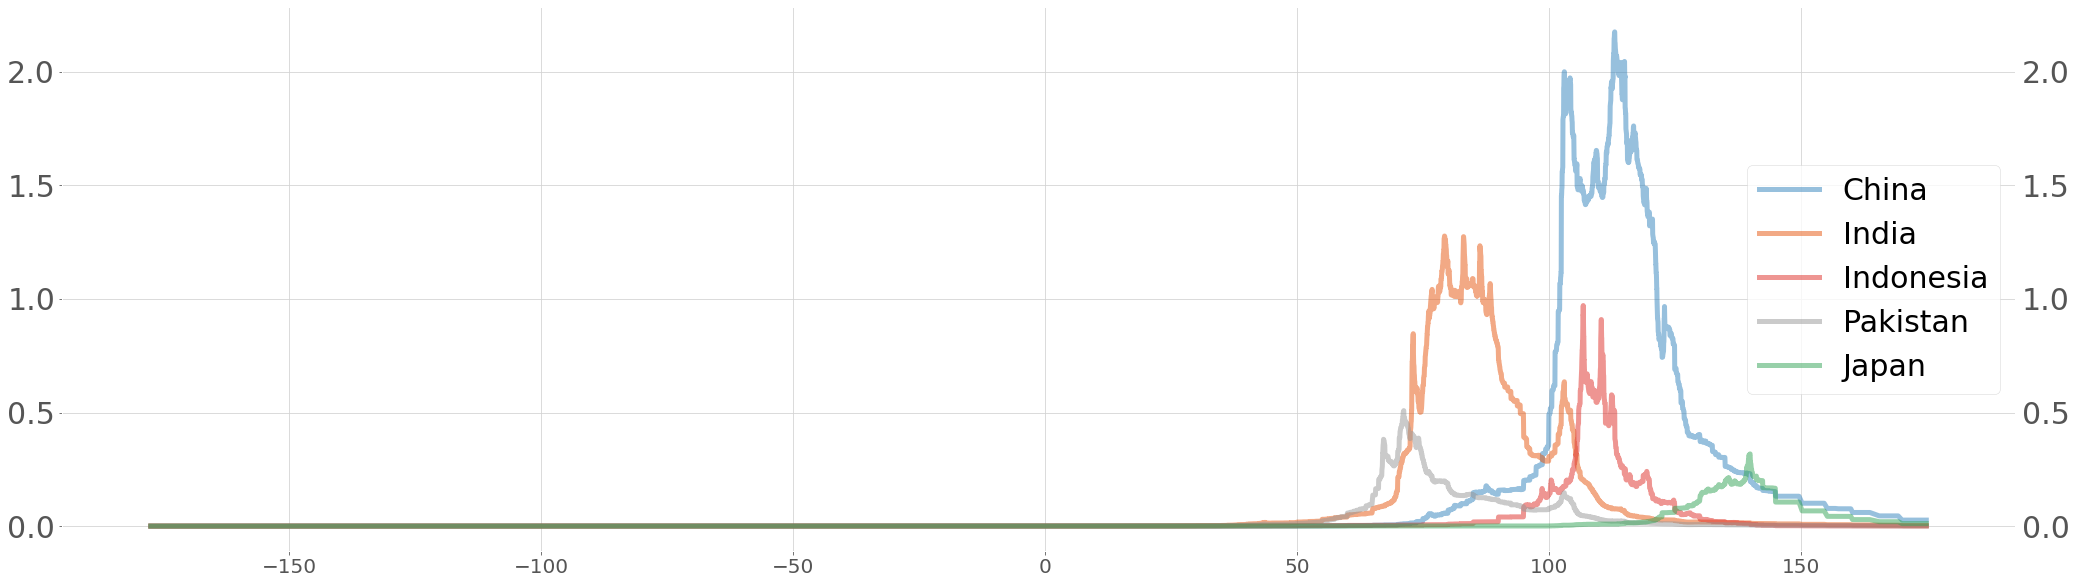

In [50]:
# plot lines
# fig, ax = plt.subplots(1, 1)
plt.figure(figsize=(35, 10))
plt.plot(longitude_pro.long, longitude_pro.China, label = "China",color='#3182bd',alpha=0.5,linewidth=5)
plt.plot(longitude_pro.long, longitude_pro.India, label = "India",color='#e6550d',alpha=0.5,linewidth=5)
plt.plot(longitude_pro.long, longitude_pro['Indonesia'], label = 'Indonesia',color='#de2d26',alpha=0.5,linewidth=5)
plt.plot(longitude_pro.long, longitude_pro.Pakistan, label = "Pakistan",color='#969696',alpha=0.5,linewidth=5)
plt.plot(longitude_pro.long, longitude_pro['Japan'], label = "Japan",color='#31a354',alpha=0.5,linewidth=5)
plt.legend(fontsize = 30,loc='right')

plt.tick_params(axis='y',  labelleft='off', labelright='on')
plt.xticks(fontsize=20)
plt.yticks(fontsize=30)
# plt.xlim(40)
plt.grid(visible=True,color='lightgrey')
plt.rcParams['axes.facecolor'] = 'white'
plt.show()

### Latitude production

In [48]:
latitude_pro[ 'China_rolling' ] = latitude_pro.China.rolling(20).mean()
latitude_pro[ 'India_rolling' ] = latitude_pro['India'].rolling(20).mean()
latitude_pro[ 'Indonesia_rolling' ] = latitude_pro.Indonesia.rolling(20).mean()
latitude_pro[ 'Pakistan_rolling' ] = latitude_pro['Pakistan'].rolling(20).mean()
latitude_pro[ 'Japan_rolling' ] = latitude_pro.Japan.rolling(20).mean()

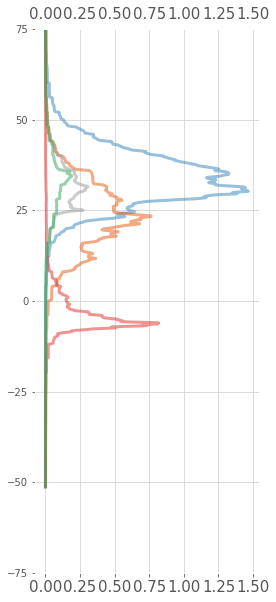

In [49]:
# plot lines
plt.figure(figsize=(4, 10))
plt.plot(latitude_pro.China_rolling, latitude_pro.lat, label = "China",color='#3182bd',alpha=0.5,linewidth=3)
plt.plot(latitude_pro.India_rolling, latitude_pro.lat, label = "India",color='#e6550d',alpha=0.5,linewidth=3)
plt.plot(latitude_pro.Indonesia_rolling, latitude_pro.lat, label = "Indonesia",color='#de2d26',alpha=0.5,linewidth=3)
plt.plot(latitude_pro.Pakistan_rolling, latitude_pro.lat, label = 'Pakistan',color='#969696',alpha=0.5,linewidth=3)
plt.plot(latitude_pro.Japan_rolling, latitude_pro.lat, label = "Japan",color='#31a354',alpha=0.5,linewidth=3)
# plt.legend()
plt.tick_params(axis='x',  labelbottom='off', labeltop='on')
plt.xticks(fontsize=15)
plt.ylim(-75, 75)
plt.yticks([-75,-50,-25,0,25,50,75])
plt.grid(visible=True,color='lightgrey')
plt.rcParams['axes.facecolor'] = 'white'
plt.show()

### Longitude consumption

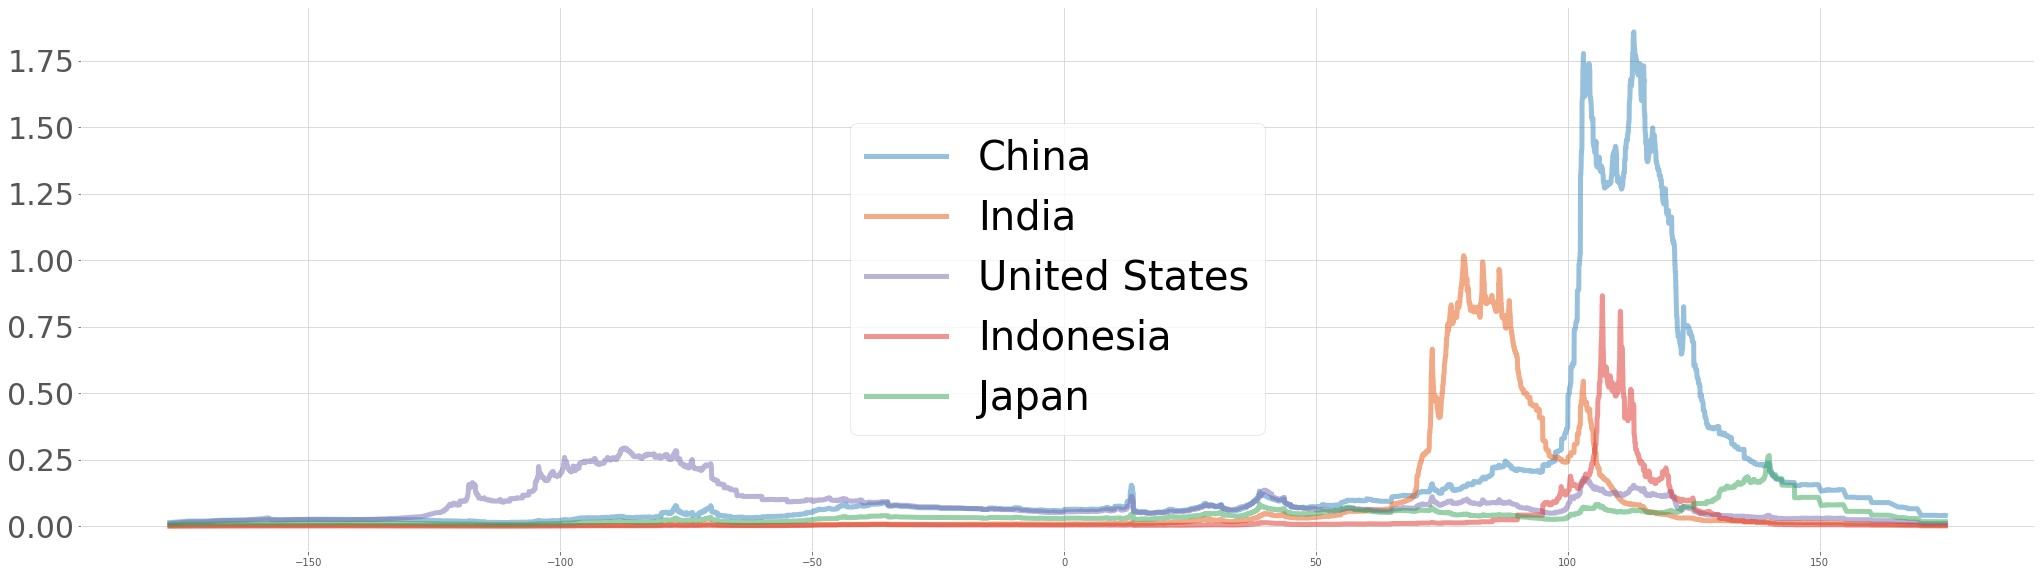

In [100]:
# plot lines
plt.figure(figsize=(35, 10))
plt.plot(longitude_con.long, longitude_con.China, label = "China",color='#3182bd',alpha=0.5,linewidth=5)
plt.plot(longitude_con.long, longitude_con.India, label = "India",color='#e6550d',alpha=0.5,linewidth=5)
plt.plot(longitude_con.long, longitude_con['United States'], label = "United States",color='#756bb1',alpha=0.5,linewidth=5)
plt.plot(longitude_con.long, longitude_con.Indonesia, label = "Indonesia",color='#de2d26',alpha=0.5,linewidth=5)
plt.plot(longitude_con.long, longitude_con['Japan'], label = 'Japan',color='#31a354',alpha=0.5,linewidth=5)

plt.legend(fontsize = 40,loc='center')
# plt.xticks(fontsize=20)
plt.grid(visible=True,color='lightgrey')
plt.rcParams['axes.facecolor'] = 'white'
plt.yticks(fontsize=30)
plt.show()

### Latitude consumption

In [101]:
latitude_con[ 'China_rolling' ] = latitude_con.China.rolling(20).mean()
latitude_con[ 'USA_rolling' ] = latitude_con['United States'].rolling(20).mean()
latitude_con[ 'India_rolling' ] = latitude_con.India.rolling(20).mean()
latitude_con[ 'Japan_rolling' ] = latitude_con.Japan.rolling(20).mean()
latitude_con[ 'Indonesia_rolling' ] = latitude_con.Indonesia.rolling(20).mean()

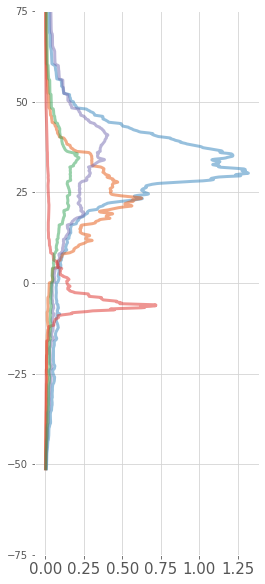

In [102]:
# plot lines
plt.figure(figsize=(4, 10))
plt.plot(latitude_con.China_rolling, latitude_con.lat, label = "China",color='#3182bd',alpha=0.5,linewidth=3)
plt.plot(latitude_con.India_rolling, latitude_con.lat, label = "Inida",color='#e6550d',alpha=0.5,linewidth=3)
plt.plot(latitude_con.USA_rolling, latitude_con.lat,  label = "United States",color='#756bb1',alpha=0.5,linewidth=3)
plt.plot(latitude_con.Indonesia_rolling, latitude_con.lat, label = "Indonesia",color='#de2d26',alpha=0.5,linewidth=3)
plt.plot(latitude_con.Japan_rolling, latitude_con.lat, label = 'Japan',color='#31a354',alpha=0.5,linewidth=3)
plt.grid(visible=True,color='lightgrey')
plt.rcParams['axes.facecolor'] = 'white'
plt.xticks(fontsize=15)
plt.ylim(-75, 75)
plt.yticks([-75,-50,-25,0,25,50,75])
# plt.legend()
plt.show()

In [68]:
wholeworld

,AllCause,BasePM25,NH3,NOx,PNH4,PNO3,PSO4,SOA,SOx,TotalPM25,...,JPN_pro,BRA_pro,USA_pro,CHN_con,IND_con,USA_con,IDN_con,JPN_con,PAK_con,BRA_con
0,0.0,0.426418,3.306430e-08,0.000026,3.823407e-07,0.000032,6.211904e-08,0.000062,6.966243e-31,0.000102,...,2.855758e-24,3.160822e-06,1.838655e-07,0.000010,9.377461e-07,0.000006,7.853496e-07,0.000005,1.935866e-07,0.000004
1,0.0,0.508265,2.946418e-08,0.000018,2.678014e-07,0.000024,4.362572e-08,0.000039,4.418886e-32,0.000069,...,5.422374e-25,1.960844e-06,1.627805e-07,0.000012,1.121783e-06,0.000006,9.757682e-07,0.000006,2.409814e-07,0.000003
2,0.0,0.550982,1.279915e-08,0.000008,1.222217e-07,0.000012,1.940901e-08,0.000018,3.906132e-33,0.000032,...,8.404693e-26,8.498653e-07,9.123313e-08,0.000020,1.758312e-06,0.000009,1.587083e-06,0.000009,3.931286e-07,0.000002
3,0.0,0.680774,1.095016e-08,0.000005,6.015143e-08,0.000007,9.625518e-09,0.000010,2.494349e-32,0.000019,...,2.649576e-26,4.538413e-07,7.885440e-08,0.000020,1.722092e-06,0.000009,1.563624e-06,0.000009,3.874987e-07,0.000001
4,0.0,1.058635,7.066362e-09,0.000003,3.000796e-08,0.000006,4.464089e-09,0.000005,4.925545e-33,0.000011,...,7.198016e-26,2.887016e-07,9.114860e-08,0.000048,4.125775e-06,0.000020,3.771477e-06,0.000021,9.352572e-07,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273734,0.0,2.168654,7.947119e-04,0.041751,1.875771e-04,0.009865,4.246905e-04,0.041760,2.018801e-04,0.074618,...,1.374206e-07,2.538598e-04,6.520772e-07,0.097020,8.919147e-03,0.055754,6.880574e-03,0.042396,1.639585e-03,0.003808
273735,0.0,2.589360,3.040557e-04,0.041999,7.888069e-05,0.006906,1.920459e-04,0.029298,6.116166e-06,0.047997,...,6.019422e-08,1.065497e-04,2.432796e-07,0.270429,2.370282e-02,0.151954,1.803245e-02,0.116390,4.582933e-03,0.010190
273736,0.0,2.589360,2.915782e-04,0.049549,7.564367e-05,0.008148,1.668705e-04,0.026270,1.845838e-05,0.044568,...,5.058568e-08,8.946326e-05,2.040621e-07,0.354977,3.104328e-02,0.201721,2.349629e-02,0.152994,6.001584e-03,0.013342
273737,0.0,2.423264,3.969570e-04,0.065538,9.294472e-05,0.008939,1.520885e-04,0.021500,7.500343e-05,0.040519,...,3.904657e-08,7.049061e-05,1.577110e-07,0.427659,3.738209e-02,0.243833,2.834384e-02,0.184730,7.244131e-03,0.016086


In [75]:
max(wholeworld['USA_pro']),min(wholeworld['USA_pro'])

(31.47719680325387, 2.76814986374e-09)

Text(0, 0.5, 'latitude [degN]')

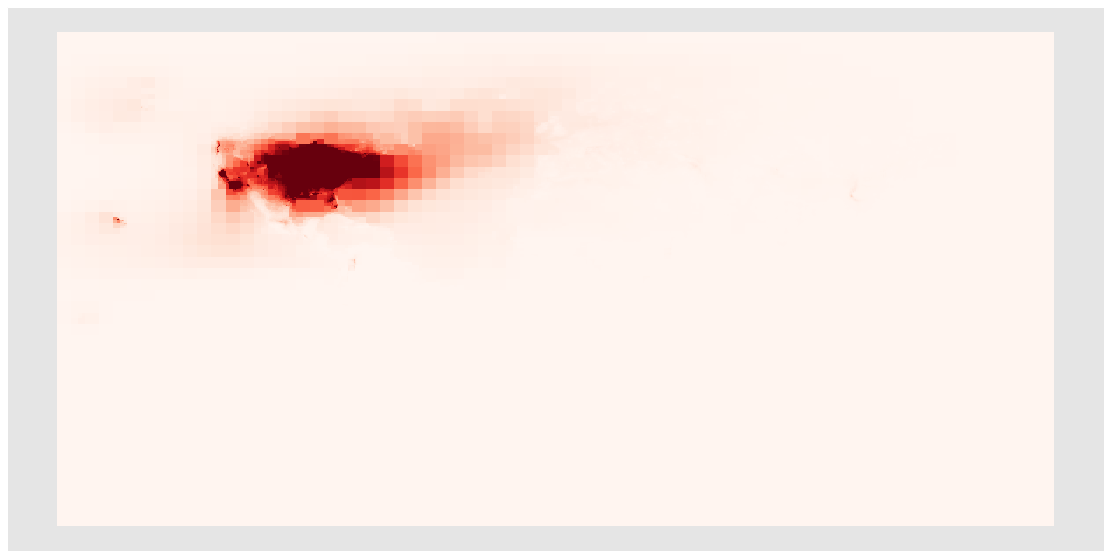

In [45]:
# fig = plt.figure(figsize=(30, 10))

ax = plt.subplot(1, 1, 1, projection=ccrs.Mollweide(central_longitude=0.0, globe=None))


wholeworld.plot(column='USA_pro',ax=ax, vmin=0,vmax=1,cmap ='Reds');

# ,missing_kwds={
#         "color": "lightgrey",
#         "edgecolor": "grey",
#         "hatch": "///",
#         "label": "Missing values",
#     }

ax.coastlines()

ax.axis()
ax.set_xticks([-150,-100,-50,0,50,100,150])
ax.set_xlabel("longitude [degE]", visible="true")
ax.set_yticks([-75,-50,-25,0,25,50,75])
ax.set_ylabel("latitude [degN]", visible="true")
# plt.show()

In [71]:
fig, ax = plt.subplots(1, 1)
wholeworld.plot(linewidths=0,column='CHN_pro',ax=ax, vmin=0,vmax=1,cmap ='Reds',missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    });
# ax.axis('off')
plt.show()

/home/shiyuan/anaconda3/envs/py36/lib/python3.6/site-packages/geopandas/plotting.py:376: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


ValueError: cannot convert float NaN to integer

ValueError: cannot convert float NaN to integer

<Figure size 2160x720 with 1 Axes>

In [34]:
max(list(wholeworld['USA_pro']))

157.38598400613202

In [35]:
np.percentile(list(wholeworld['USA_pro']),99)

15.32669271795664

In [36]:
np.percentile(list(wholeworld['CHN_pro']),100)/np.percentile(list(wholeworld['CHN_pro']),90)

18.580575195682194

# Method 1: percentile

In [289]:
# wholeworld.loc[wholeworld[wholeworld['CHN_pro']<0.0001].index,'CHN_pro'] = 0
# wholeworld.loc[wholeworld[wholeworld['IND_pro']<0.0001].index,'IND_pro'] = 0
# wholeworld.loc[wholeworld[wholeworld['IDN_pro']<0.0001].index,'IDN_pro'] = 0
# wholeworld.loc[wholeworld[wholeworld['JPN_pro']<0.0001].index,'JPN_pro'] = 0
# wholeworld.loc[wholeworld[wholeworld['PAK_pro']<0.0001].index,'PAK_pro'] = 0

## Production

In [1]:
pro_chn = list(wholeworld['CHN_pro'])
pro_ind = list(wholeworld['IND_pro'])
pro_idn = list(wholeworld['IDN_pro'])
pro_pak = list(wholeworld['PAK_pro'])
pro_jpn = list(wholeworld['JPN_pro'])

NameError: name 'wholeworld' is not defined

In [334]:
pro_total_list = sorted(pro_chn+pro_ind+pro_idn+pro_pak+pro_jpn)

In [335]:
first9_percentile = [np.percentile(pro_total_list,10),np.percentile(pro_total_list,20),np.percentile(pro_total_list,30),
                     np.percentile(pro_total_list,50),np.percentile(pro_total_list,70),np.percentile(pro_total_list,90),
                     np.percentile(pro_total_list,95),np.percentile(pro_total_list,98),np.percentile(pro_total_list,99)]   

In [336]:
first9_percentile

[3.905256738666771e-09,
 1.448240741249896e-06,
 1.746368826465831e-05,
 0.0014752466846318655,
 0.026842573450556784,
 1.1011841770248663,
 7.133958390154479,
 16.140751888232764,
 22.389221963734403]

In [337]:
first9_percentile = [0,0.02,0.05,0.1,0.5,1,5,10,20]

In [338]:
cmap_CHNpro = ListedColormap(['#FFFFFF00','#e6ecf410','#b4c7de10','#9cb4d410','#83a2c940','#6a8fbe50','#527cb460','#396aa970','#20579e80','#08459490'])
# bounds_CHNpro = [np.percentile(list(wholeworld['CHN_pro']),10),np.percentile(list(wholeworld['CHN_pro']),60),np.percentile(list(wholeworld['CHN_pro']),70)
#          ,np.percentile(list(wholeworld['CHN_pro']),80),np.percentile(list(wholeworld['CHN_pro']),85),np.percentile(list(wholeworld['CHN_pro']),90),
#         np.percentile(list(wholeworld['CHN_pro']),93),np.percentile(list(wholeworld['CHN_pro']),96),np.percentile(list(wholeworld['CHN_pro']),99),
#         np.percentile(list(wholeworld['CHN_pro']),100)]
bounds_CHNpro = first9_percentile + [ np.percentile(list(wholeworld['CHN_pro']),100)]
norm_CHNpro = BoundaryNorm(bounds_CHNpro, cmap_CHNpro.N)


In [339]:
bounds_CHNpro

[0, 0.02, 0.05, 0.1, 0.5, 1, 5, 10, 20, 240.83218072968785]

In [340]:
cmap_INDpro = ListedColormap(['#FFFFFF00','#e8d5cc10','#dcc0b310','#d1ab9a10','#c5968140','#ba816850','#ae6c4f60','#a3563670','#97421d80','#8c2d0490'])
# bounds_INDpro = [np.percentile(list(wholeworld['IND_pro']),10),np.percentile(list(wholeworld['IND_pro']),60),np.percentile(list(wholeworld['IND_pro']),70)
#          ,np.percentile(list(wholeworld['IND_pro']),80),np.percentile(list(wholeworld['IND_pro']),85),np.percentile(list(wholeworld['IND_pro']),90),
#         np.percentile(list(wholeworld['IND_pro']),93),np.percentile(list(wholeworld['IND_pro']),96),np.percentile(list(wholeworld['IND_pro']),99),
#         np.percentile(list(wholeworld['IND_pro']),100)]
bounds_INDpro = first9_percentile + [ np.percentile(list(wholeworld['IND_pro']),100)]
norm_INDpro = BoundaryNorm(bounds_INDpro, cmap_INDpro.N)

In [341]:
bounds_INDpro

[0, 0.02, 0.05, 0.1, 0.5, 1, 5, 10, 20, 227.41325271664]

In [342]:
cmap_IDNpro = ListedColormap(['#FFFFFF00','#eaccce10','#e0b2b610','#d6999e10','#cc7f8640','#c1666d50','#b74c5560','#ad323d70','#a3192580','#99000d90'])
# bounds_IDNpro = [np.percentile(list(wholeworld['IDN_pro']),10),np.percentile(list(wholeworld['IDN_pro']),80),np.percentile(list(wholeworld['IDN_pro']),85)
#          ,np.percentile(list(wholeworld['IDN_pro']),90),np.percentile(list(wholeworld['IDN_pro']),93),np.percentile(list(wholeworld['IDN_pro']),96),
#         np.percentile(list(wholeworld['IDN_pro']),98),np.percentile(list(wholeworld['IDN_pro']),99),np.percentile(list(wholeworld['IDN_pro']),99.5),
#         np.percentile(list(wholeworld['IDN_pro']),100)]
bounds_IDNpro = first9_percentile + [ np.percentile(list(wholeworld['IDN_pro']),100)]
norm_IDNpro = BoundaryNorm(bounds_IDNpro, cmap_IDNpro.N)

In [343]:
bounds_IDNpro

[0, 0.02, 0.05, 0.1, 0.5, 1, 5, 10, 20, 296.8782849854467]

In [344]:
cmap_PAKpro = ListedColormap(['#FFFFFF00','#e5e5e510','#cccccc10','#b2b2b210','#99999940','#7f7f7f50','#66666660','#4c4c4c70','#32323280','#00000090'])
# bounds_PAKpro = [np.percentile(list(wholeworld['PAK_pro']),10),np.percentile(list(wholeworld['PAK_pro']),60),np.percentile(list(wholeworld['PAK_pro']),70)
#          ,np.percentile(list(wholeworld['PAK_pro']),80),np.percentile(list(wholeworld['PAK_pro']),85),np.percentile(list(wholeworld['PAK_pro']),90),
#         np.percentile(list(wholeworld['PAK_pro']),93),np.percentile(list(wholeworld['PAK_pro']),96),np.percentile(list(wholeworld['PAK_pro']),99),
#         np.percentile(list(wholeworld['USA_pro']),100)]
bounds_PAKpro = first9_percentile + [ np.percentile(list(wholeworld['PAK_pro']),100)]
norm_PAKpro = BoundaryNorm(bounds_PAKpro, cmap_PAKpro.N)

In [345]:
bounds_PAKpro

[0, 0.02, 0.05, 0.1, 0.5, 1, 5, 10, 20, 103.99866528413004]

In [346]:
# '#FFFFFF00','#fcfbfd20','#efedf530','#dadaeb40','#bcbddc50','#9e9ac860','#807dba70','#6a51a380','#4a148690'
cmap_JPNpro = ListedColormap(['#FFFFFF00','#ccded610','#b2cdc110','#99bdad10','#7fac9840','#669c8450','#4c8b6f60','#327a5a70','#196a4680','#005a3290'])
# bounds_JPNpro = [np.percentile(list(wholeworld['JPN_pro']),10),np.percentile(list(wholeworld['JPN_pro']),80),np.percentile(list(wholeworld['JPN_pro']),85)
#          ,np.percentile(list(wholeworld['JPN_pro']),90),np.percentile(list(wholeworld['JPN_pro']),92),np.percentile(list(wholeworld['JPN_pro']),94),
#         np.percentile(list(wholeworld['JPN_pro']),96),np.percentile(list(wholeworld['JPN_pro']),99),np.percentile(list(wholeworld['JPN_pro']),99.5),
#         np.percentile(list(wholeworld['JPN_pro']),100)]
bounds_JPNpro = first9_percentile + [ np.percentile(list(wholeworld['JPN_pro']),100)]
norm_JPNpro = BoundaryNorm(bounds_JPNpro, cmap_JPNpro.N)

In [347]:
bounds_JPNpro

[0, 0.02, 0.05, 0.1, 0.5, 1, 5, 10, 20, 51.777015703005105]

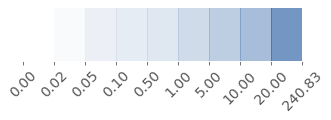

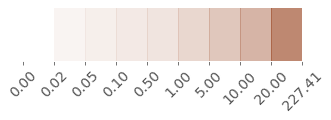

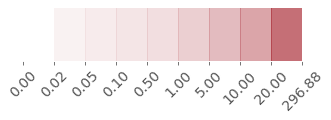

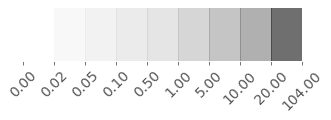

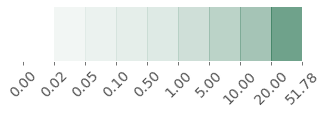

In [367]:
from matplotlib.ticker import FormatStrFormatter
cmap_CHNpro = ListedColormap(['#FFFFFF','#e6ecf440','#b4c7de40','#9cb4d440','#83a2c940','#6a8fbe50','#527cb460','#396aa970','#20579e80','#08459490'])
cmap_INDpro = ListedColormap(['#FFFFFF','#e8d5cc40','#dcc0b340','#d1ab9a40','#c5968140','#ba816850','#ae6c4f60','#a3563670','#97421d80','#8c2d0490'])
cmap_IDNpro = ListedColormap(['#FFFFFF','#eaccce40','#e0b2b640','#d6999e40','#cc7f8640','#c1666d50','#b74c5560','#ad323d70','#a3192580','#99000d90'])
cmap_PAKpro = ListedColormap(['#FFFFFF','#e5e5e540','#cccccc40','#b2b2b240','#99999940','#7f7f7f50','#66666660','#4c4c4c70','#32323280','#00000090'])
cmap_JPNpro = ListedColormap(['#FFFFFF','#ccded640','#b2cdc140','#99bdad40','#7fac9840','#669c8450','#4c8b6f60','#327a5a70','#196a4680','#005a3290'])



fig, ax = plt.subplots(figsize=(5, 1))
cbar_CHNpro = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap_CHNpro, norm=norm_CHNpro), cax=ax,orientation='horizontal')
# cbar_CHNpro.set_label('CHNpro Color Scale')
yticks = [ '%.2f' % elem for elem in bounds_CHNpro]
ax.set_xticklabels(yticks,fontsize=14,rotation=45)
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

fig, ax = plt.subplots(figsize=(5, 1))
cbar_INDpro = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap_INDpro, norm=norm_INDpro), cax=ax,orientation='horizontal')
# cbar_CHNpro.set_label('CHNpro Color Scale')
yticks = [ '%.2f' % elem for elem in bounds_INDpro]
ax.set_xticklabels(yticks,fontsize=14,rotation=45)
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

fig, ax = plt.subplots(figsize=(5, 1))
cbar_IDNpro = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap_IDNpro, norm=norm_IDNpro), cax=ax,orientation='horizontal')
# cbar_CHNpro.set_label('CHNpro Color Scale')
yticks = [ '%.2f' % elem for elem in bounds_IDNpro]
ax.set_xticklabels(yticks,fontsize=14,rotation=45)


fig, ax = plt.subplots(figsize=(5, 1))
cbar_PAKpro = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap_PAKpro, norm=norm_PAKpro), cax=ax,orientation='horizontal')
# cbar_CHNpro.set_label('CHNpro Color Scale')
yticks = [ '%.2f' % elem for elem in bounds_PAKpro]
ax.set_xticklabels(yticks,fontsize=14,rotation=45)

fig, ax = plt.subplots(figsize=(5, 1))
cbar_JPNpro = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap_JPNpro, norm=norm_JPNpro), cax=ax,orientation='horizontal')
# cbar_CHNpro.set_label('CHNpro Color Scale')
yticks = [ '%.2f' % elem for elem in bounds_JPNpro]
ax.set_xticklabels(yticks,fontsize=14,rotation=45)

plt.show()

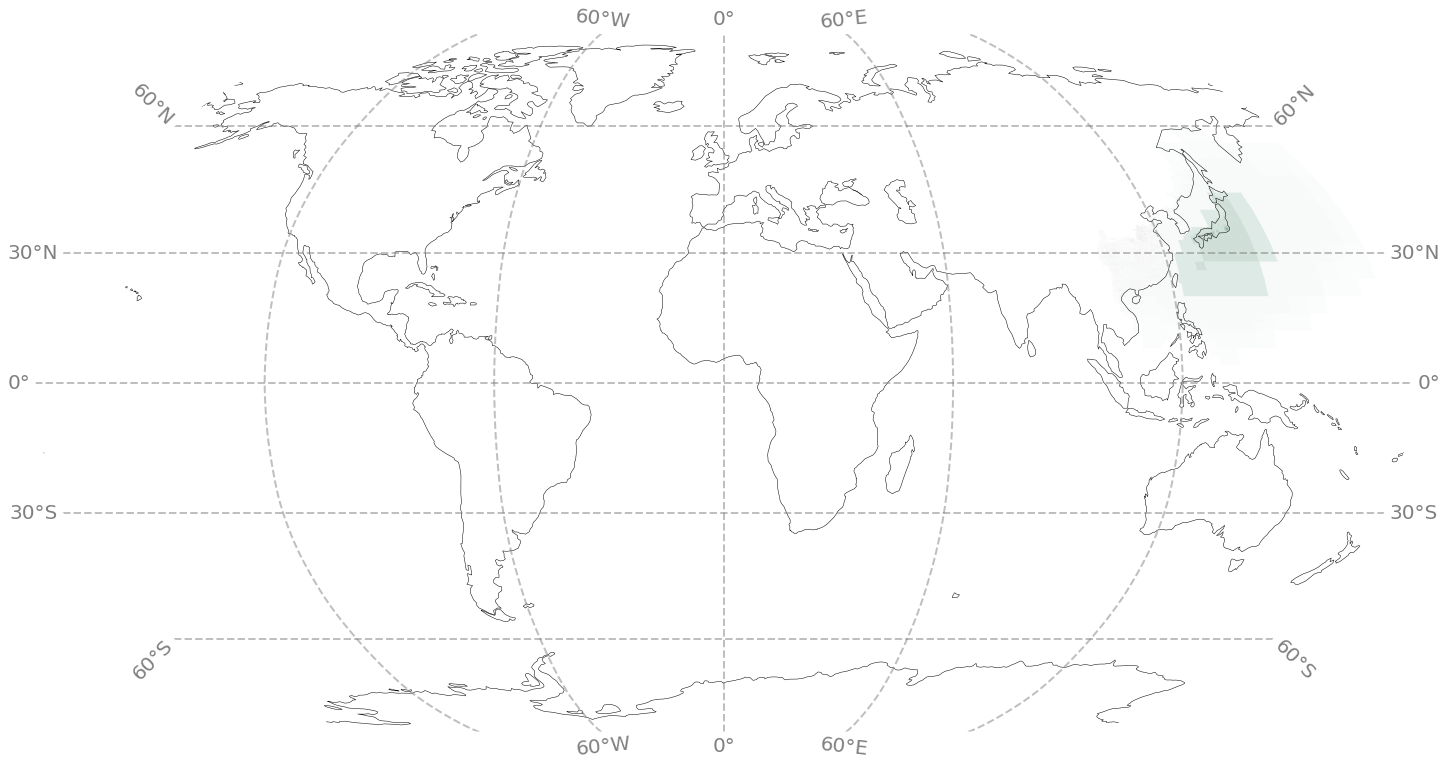

In [348]:
fig = plt.figure(figsize=(30, 10))

ax = plt.axes(projection=ccrs.Robinson())

robinson = ccrs.Robinson().proj4_init

wholeworld.to_crs(robinson).plot(linewidths=0,column='JPN_pro', ax=ax, vmin=0,vmax=1,cmap =cmap_JPNpro, norm=norm_JPNpro);

plt.grid(visible=True,color='lightgrey')
plt.rcParams['axes.facecolor'] = 'white'


# ax.set_xticks([-150,-100,-50,0,50,100,150])
ax.set_xlabel("longitude [degE]", visible="true",fontsize=20)
# ax.set_yticks([-75,-50,-25,0,25,50,75])
ax.set_ylabel("latitude [degN]", visible="true",fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabel_style = {'size': 20,'color':'gray'}
gl.ylabel_style = {'size': 20,'color':'gray'}
plt.tight_layout()

plt.show()

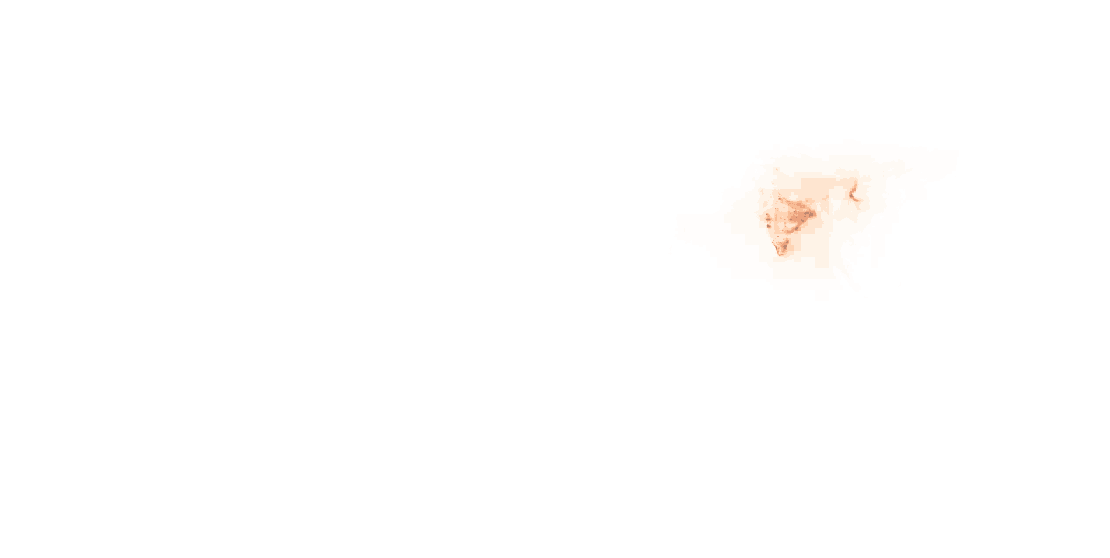

In [324]:
fig, ax = plt.subplots(1, 1)


wholeworld.plot(linewidths=0,column='IND_pro',ax=ax, vmin=0,vmax=1,cmap =cmap_INDpro, norm=norm_INDpro, missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    });


ax.axis('off')
plt.show()

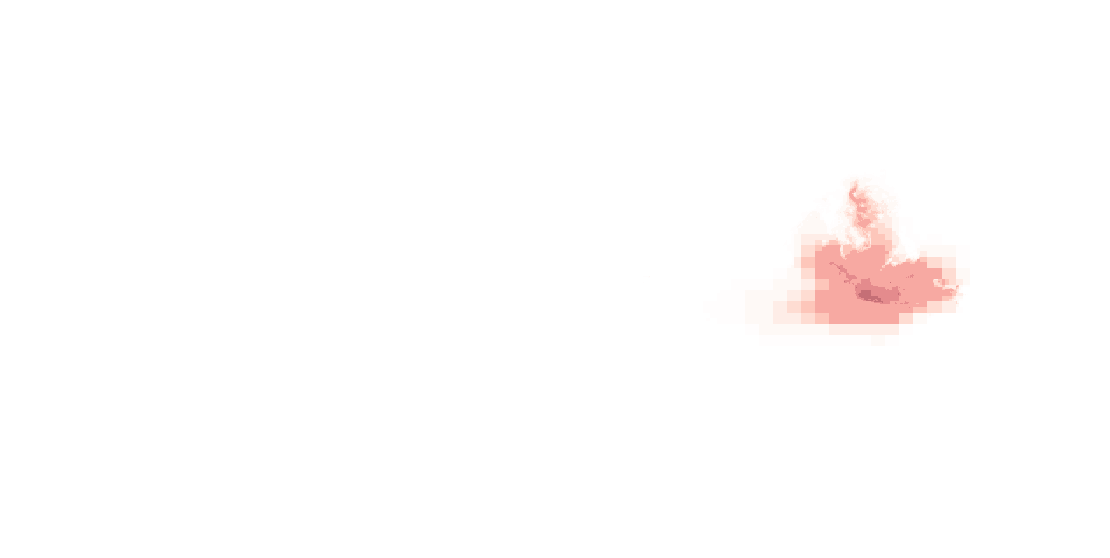

In [325]:
fig, ax = plt.subplots(1, 1)

wholeworld.plot(linewidths=0,column='IDN_pro',ax=ax, vmin=0,vmax=1,cmap =cmap_IDNpro, norm=norm_IDNpro,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    });


ax.axis('off')
plt.show()

NameError: name 'cmap_PAKpro' is not defined

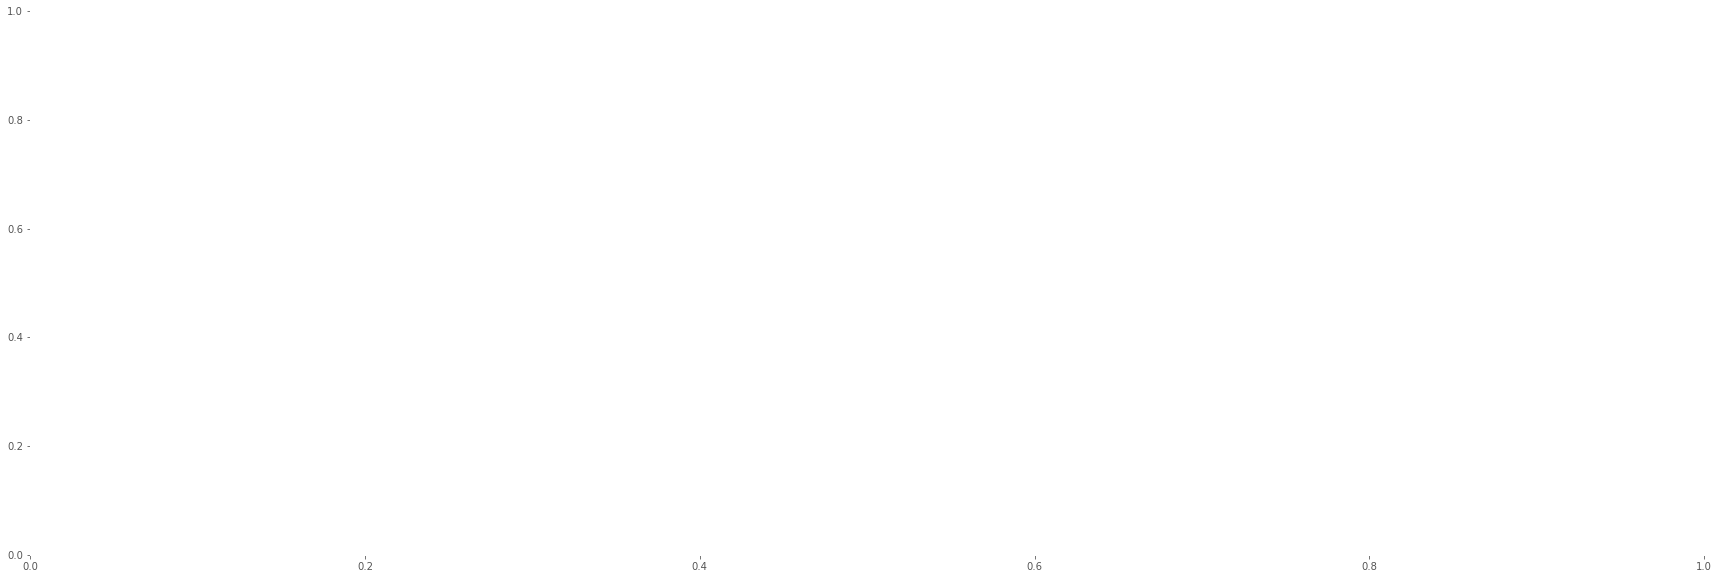

In [72]:
fig, ax = plt.subplots(1, 1)

wholeworld.plot(linewidths=0,column='PAK_pro',ax=ax, vmin=0,vmax=1,cmap =cmap_PAKpro,norm=norm_PAKpro,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    });

ax.axis('off')
plt.show()

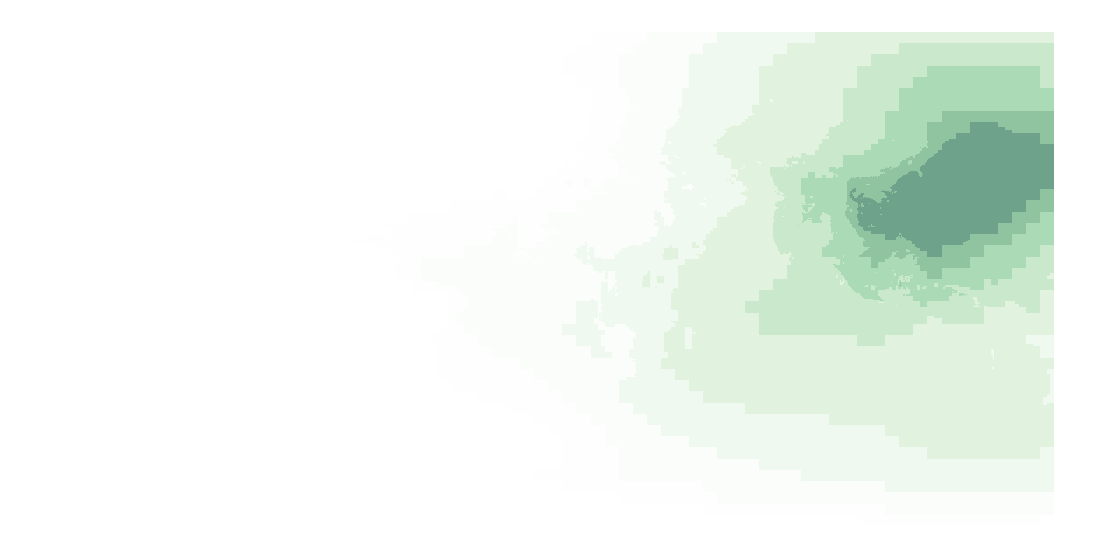

In [86]:
fig, ax = plt.subplots(1, 1)


wholeworld.plot(linewidths=0,column='JPN_pro',ax=ax, vmin=0,vmax=1,cmap =cmap_JPNpro,norm=norm_JPNpro,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    });


ax.axis('off')
plt.show()

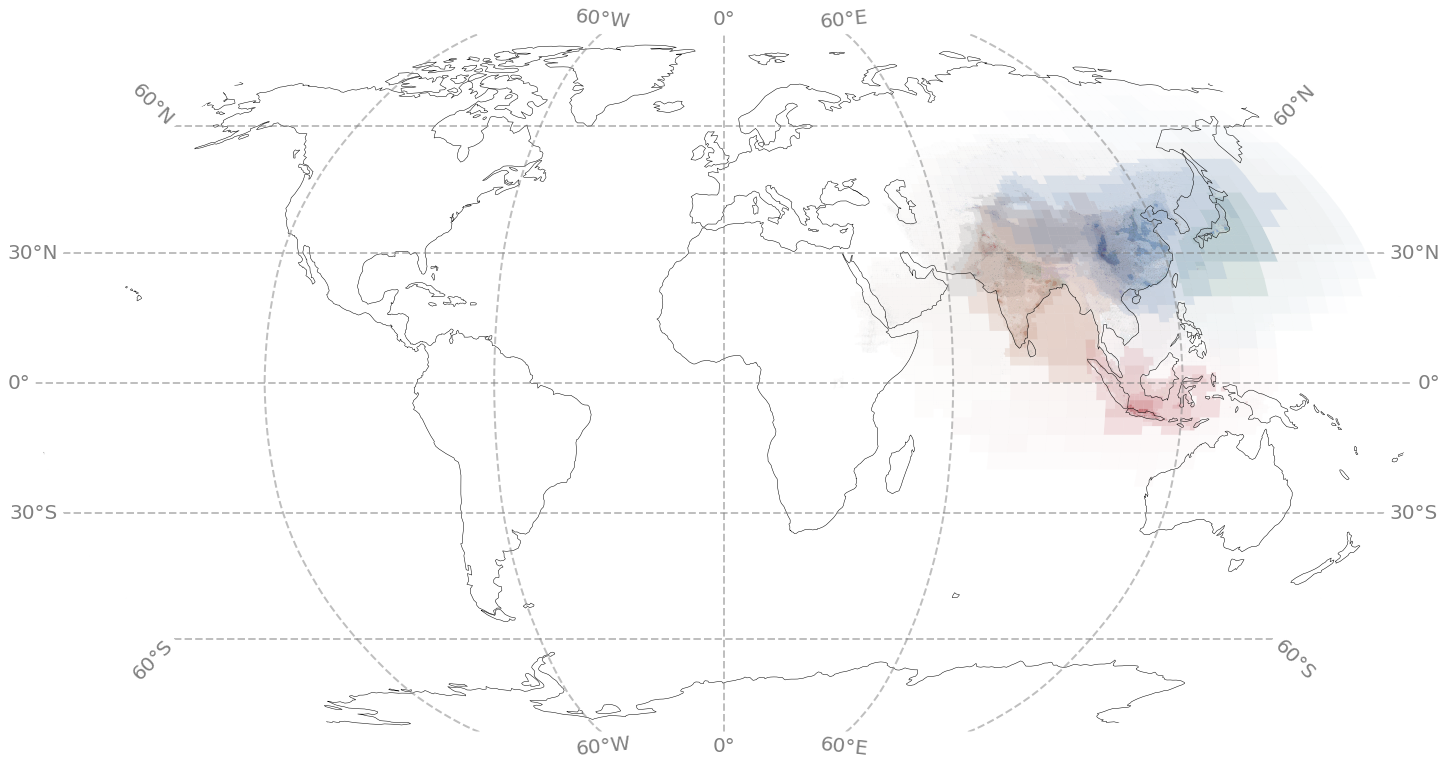

In [287]:
fig = plt.figure(figsize=(30, 10))

ax = plt.axes(projection=ccrs.Robinson())

robinson = ccrs.Robinson().proj4_init

wholeworld.to_crs(robinson).plot(linewidths=0,column='JPN_pro',ax=ax, vmin=0,vmax=1,cmap =cmap_JPNpro, norm=norm_JPNpro);

wholeworld.to_crs(robinson).plot(linewidths=0,column='PAK_pro',ax=ax, vmin=0,vmax=1,cmap =cmap_PAKpro,  norm=norm_PAKpro);

wholeworld.to_crs(robinson).plot(linewidths=0,column='IDN_pro',ax=ax, vmin=0,vmax=1,cmap =cmap_IDNpro, norm=norm_IDNpro);

wholeworld.to_crs(robinson).plot(linewidths=0,column='IND_pro',ax=ax, vmin=0,vmax=1,cmap =cmap_INDpro, norm=norm_INDpro);

wholeworld.to_crs(robinson).plot(linewidths=0,column='CHN_pro',ax=ax, vmin=0,vmax=1,cmap =cmap_CHNpro, norm=norm_CHNpro);

# , missing_kwds={
#         "color": "lightgrey",
#         "edgecolor": "grey",
#         "hatch": "///",
#         "label": "Missing values",
#     }


plt.grid(visible=True,color='lightgrey')
plt.rcParams['axes.facecolor'] = 'white'

ax.axis()


ax.set_xlabel("longitude [degE]", visible="true",fontsize=20)

ax.set_ylabel("latitude [degN]", visible="true",fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabel_style = {'size': 20,'color':'gray'}
gl.ylabel_style = {'size': 20,'color':'gray'}
plt.tight_layout()

plt.show()

### put the country line.

## Consumption

### New methods
1.	Top scale keeps the same, the second one use the same value for all scales (99th/90th percentile of the whole data); remaining scales be linear.
2.	Part B in the main text, A in supporting;
3.	Get rid of marginal density plot (keep both)
4.	The union of top 5 producer and consumer.

In [349]:
con_chn = list(wholeworld['CHN_con'])
con_ind = list(wholeworld['IND_con'])
con_usa = list(wholeworld['USA_con'])
con_idn = list(wholeworld['IDN_con'])
con_jpn = list(wholeworld['JPN_con'])

In [350]:
con_total_list = sorted(con_chn+con_ind+con_usa+con_idn+con_jpn)

In [351]:
first9_percentile = [np.percentile(con_total_list,10),np.percentile(con_total_list,20),np.percentile(con_total_list,30),
                     np.percentile(con_total_list,50),np.percentile(con_total_list,70),np.percentile(con_total_list,90),
                     np.percentile(con_total_list,95),np.percentile(con_total_list,98),np.percentile(con_total_list,99)]   

In [352]:
first9_percentile

[0.007944981224655707,
 0.0201972867825939,
 0.03688973255048974,
 0.10328446885831302,
 0.2831021844199071,
 1.4721819759133352,
 5.754721586796609,
 13.39631642929547,
 18.468128842030893]

In [353]:
first9_percentile = [0,0.05,0.1,0.5,1,4,8,10,20]

In [354]:
cmap_CHNcon = ListedColormap(['#FFFFFF00','#e6ecf410','#b4c7de10','#9cb4d410','#83a2c940','#6a8fbe50','#527cb460','#396aa970','#20579e80','#08459490'])
# bounds_CHNcon = [np.percentile(list(wholeworld['CHN_con']),10),np.percentile(list(wholeworld['CHN_con']),30),np.percentile(list(wholeworld['CHN_con']),50)
#          ,np.percentile(list(wholeworld['CHN_con']),70),np.percentile(list(wholeworld['CHN_con']),80),np.percentile(list(wholeworld['CHN_con']),85),
#         np.percentile(list(wholeworld['CHN_con']),90),np.percentile(list(wholeworld['CHN_con']),95),np.percentile(list(wholeworld['CHN_con']),99),
#         np.percentile(list(wholeworld['CHN_con']),100)]
bounds_CHNcon = first9_percentile + [np.percentile(list(wholeworld['CHN_con']),100)]
norm_CHNcon = BoundaryNorm(bounds_CHNcon, cmap_CHNcon.N)

In [355]:
bounds_CHNcon

[0, 0.05, 0.1, 0.5, 1, 4, 8, 10, 20, 191.2177640031597]

In [356]:
cmap_INDcon = ListedColormap(['#FFFFFF00','#e8d5cc10','#dcc0b310','#d1ab9a10','#c5968140','#ba816850','#ae6c4f60','#a3563670','#97421d80','#8c2d0490'])
# bounds_INDcon = [np.percentile(list(wholeworld['IND_con']),10),np.percentile(list(wholeworld['IND_con']),30),np.percentile(list(wholeworld['IND_con']),50)
#          ,np.percentile(list(wholeworld['IND_con']),70),np.percentile(list(wholeworld['IND_con']),80),np.percentile(list(wholeworld['IND_con']),85),
#         np.percentile(list(wholeworld['IND_con']),90),np.percentile(list(wholeworld['IND_con']),95),np.percentile(list(wholeworld['IND_con']),99),
#         np.percentile(list(wholeworld['IND_con']),100)]
bounds_INDcon = first9_percentile + [np.percentile(list(wholeworld['IND_con']),100)]
norm_INDcon = BoundaryNorm(bounds_INDcon, cmap_INDcon.N)

In [357]:
bounds_INDcon

[0, 0.05, 0.1, 0.5, 1, 4, 8, 10, 20, 161.30706757546625]

In [358]:
cmap_USAcon = ListedColormap(['#FFFFFF00','#dad0e610','#c8b8da10','#b6a1ce10','#a489c240','#9272b650','#805aaa60','#6e429e70','#5c2b9280','#4a148690'])
# bounds_USAcon = [np.percentile(list(wholeworld['USA_con']),10),np.percentile(list(wholeworld['USA_con']),30),np.percentile(list(wholeworld['USA_con']),50)
#          ,np.percentile(list(wholeworld['USA_con']),70),np.percentile(list(wholeworld['USA_con']),80),np.percentile(list(wholeworld['USA_con']),85),
#         np.percentile(list(wholeworld['USA_con']),90),np.percentile(list(wholeworld['USA_con']),95),np.percentile(list(wholeworld['USA_con']),99),
#         np.percentile(list(wholeworld['USA_con']),100)]
bounds_USAcon = first9_percentile + [np.percentile(list(wholeworld['USA_con']),100)]
norm_USAcon = BoundaryNorm(bounds_USAcon, cmap_USAcon.N)

In [359]:
bounds_USAcon

[0, 0.05, 0.1, 0.5, 1, 4, 8, 10, 20, 47.27198179138834]

In [360]:
cmap_IDNcon = ListedColormap(['#FFFFFF00','#eaccce10','#e0b2b610','#d6999e10','#cc7f8640','#c1666d50','#b74c5560','#ad323d70','#a3192580','#99000d90'])
# bounds_IDNcon = [np.percentile(list(wholeworld['IDN_con']),10),np.percentile(list(wholeworld['IDN_con']),30),np.percentile(list(wholeworld['IDN_con']),50)
#          ,np.percentile(list(wholeworld['IDN_con']),70),np.percentile(list(wholeworld['IDN_con']),80),np.percentile(list(wholeworld['IDN_con']),85),
#         np.percentile(list(wholeworld['IDN_con']),90),np.percentile(list(wholeworld['IDN_con']),95),np.percentile(list(wholeworld['IDN_con']),99),
#         np.percentile(list(wholeworld['IDN_con']),100)]

bounds_IDNcon = first9_percentile + [np.percentile(list(wholeworld['IDN_con']),100)]
norm_IDNcon = BoundaryNorm(bounds_IDNcon, cmap_IDNcon.N)

In [361]:
bounds_IDNcon

[0, 0.05, 0.1, 0.5, 1, 4, 8, 10, 20, 260.1316906785974]

In [362]:
cmap_JPNcon = ListedColormap(['#FFFFFF00','#ccded610','#b2cdc110','#99bdad10','#7fac9840','#669c8450','#4c8b6f60','#327a5a70','#196a4680','#005a3290'])
# bounds_JPNcon = [np.percentile(list(wholeworld['JPN_con']),10),np.percentile(list(wholeworld['JPN_con']),30),np.percentile(list(wholeworld['JPN_con']),50)
#          ,np.percentile(list(wholeworld['JPN_con']),70),np.percentile(list(wholeworld['JPN_con']),80),np.percentile(list(wholeworld['JPN_con']),85),
#         np.percentile(list(wholeworld['JPN_con']),90),np.percentile(list(wholeworld['JPN_con']),95),np.percentile(list(wholeworld['JPN_con']),99),
#         np.percentile(list(wholeworld['JPN_con']),100)]

bounds_JPNcon = first9_percentile + [np.percentile(list(wholeworld['JPN_con']),100)]
norm_JPNcon = BoundaryNorm(bounds_JPNcon, cmap_JPNcon.N)

In [363]:
bounds_JPNcon

[0, 0.05, 0.1, 0.5, 1, 4, 8, 10, 20, 37.669093915714896]

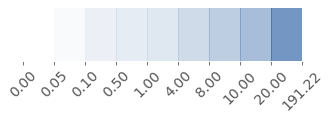

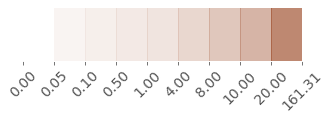

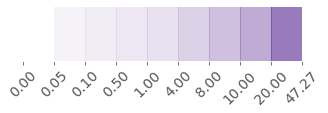

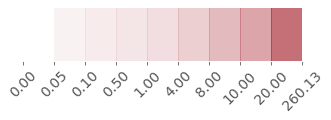

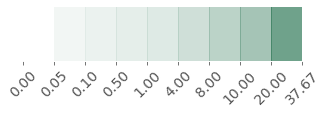

In [332]:
# Create a color bar for con

from matplotlib.ticker import FormatStrFormatter
cmap_CHNcon = ListedColormap(['#FFFFFF00','#e6ecf440','#b4c7de40','#9cb4d440','#83a2c940','#6a8fbe50','#527cb460','#396aa970','#20579e80','#08459490'])
cmap_INDcon = ListedColormap(['#FFFFFF00','#e8d5cc40','#dcc0b340','#d1ab9a40','#c5968140','#ba816850','#ae6c4f60','#a3563670','#97421d80','#8c2d0490'])
cmap_USAcon = ListedColormap(['#FFFFFF00','#dad0e640','#c8b8da40','#b6a1ce40','#a489c240','#9272b650','#805aaa60','#6e429e70','#5c2b9280','#4a148690'])
cmap_IDNcon = ListedColormap(['#FFFFFF00','#eaccce40','#e0b2b640','#d6999e40','#cc7f8640','#c1666d50','#b74c5560','#ad323d70','#a3192580','#99000d90'])
cmap_JPNcon = ListedColormap(['#FFFFFF00','#ccded640','#b2cdc140','#99bdad40','#7fac9840','#669c8450','#4c8b6f60','#327a5a70','#196a4680','#005a3290'])


fig, ax = plt.subplots(figsize=(5,1))
cbar_CHNcon = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap_CHNcon, norm=norm_CHNcon), cax=ax,orientation='horizontal')
# cbar_CHNpro.set_label('CHNpro Color Scale')
yticks = [ '%.2f' % elem for elem in bounds_CHNcon]
ax.set_xticklabels(yticks,fontsize=14,rotation=45)
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

fig, ax = plt.subplots(figsize=(5, 1))
cbar_INDcon = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap_INDcon, norm=norm_INDcon), cax=ax,orientation='horizontal')
# cbar_CHNpro.set_label('CHNpro Color Scale')
yticks = [ '%.2f' % elem for elem in bounds_INDcon]
ax.set_xticklabels(yticks,fontsize=14,rotation=45)
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

fig, ax = plt.subplots(figsize=(5, 1))
cbar_USAcon = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap_USAcon, norm=norm_USAcon), cax=ax,orientation='horizontal')
# cbar_CHNpro.set_label('CHNpro Color Scale')
yticks = [ '%.2f' % elem for elem in bounds_USAcon]
ax.set_xticklabels(yticks,fontsize=14,rotation=45)

fig, ax = plt.subplots(figsize=(5, 1))
cbar_IDNcon = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap_IDNcon, norm=norm_IDNcon), cax=ax,orientation='horizontal')
# cbar_CHNpro.set_label('CHNpro Color Scale')
yticks = [ '%.2f' % elem for elem in bounds_IDNcon]
ax.set_xticklabels(yticks,fontsize=14,rotation=45)




fig, ax = plt.subplots(figsize=(5, 1))
cbar_JPNcon = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap_JPNcon, norm=norm_JPNcon), cax=ax,orientation='horizontal')
# cbar_CHNpro.set_label('CHNpro Color Scale')
yticks = [ '%.2f' % elem for elem in bounds_JPNcon]
ax.set_xticklabels(yticks,fontsize=14,rotation=45)

plt.show()

In [316]:
fig, ax = plt.subplots(1, 1)

wholeworld.plot(linewidths=0,column='CHN_con',ax=ax, vmin=0,vmax=max(list(wholeworld['CHN_con'])),cmap =cmap_CHNcon,  norm=norm_CHNcon, missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    });
ax.axis('off')
plt.show()

/home/shiyuan/anaconda3/envs/py36/lib/python3.6/site-packages/geopandas/plotting.py:376: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


ValueError: cannot convert float NaN to integer

ValueError: cannot convert float NaN to integer

<Figure size 2160x720 with 1 Axes>

In [ ]:
fig, ax = plt.subplots(1, 1)

wholeworld.plot(linewidths=0,column='USA_con',ax=ax, vmin=0,vmax=1,cmap =cmap_USAcon,  norm=norm_USAcon, missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    });
ax.axis('off')
plt.show()

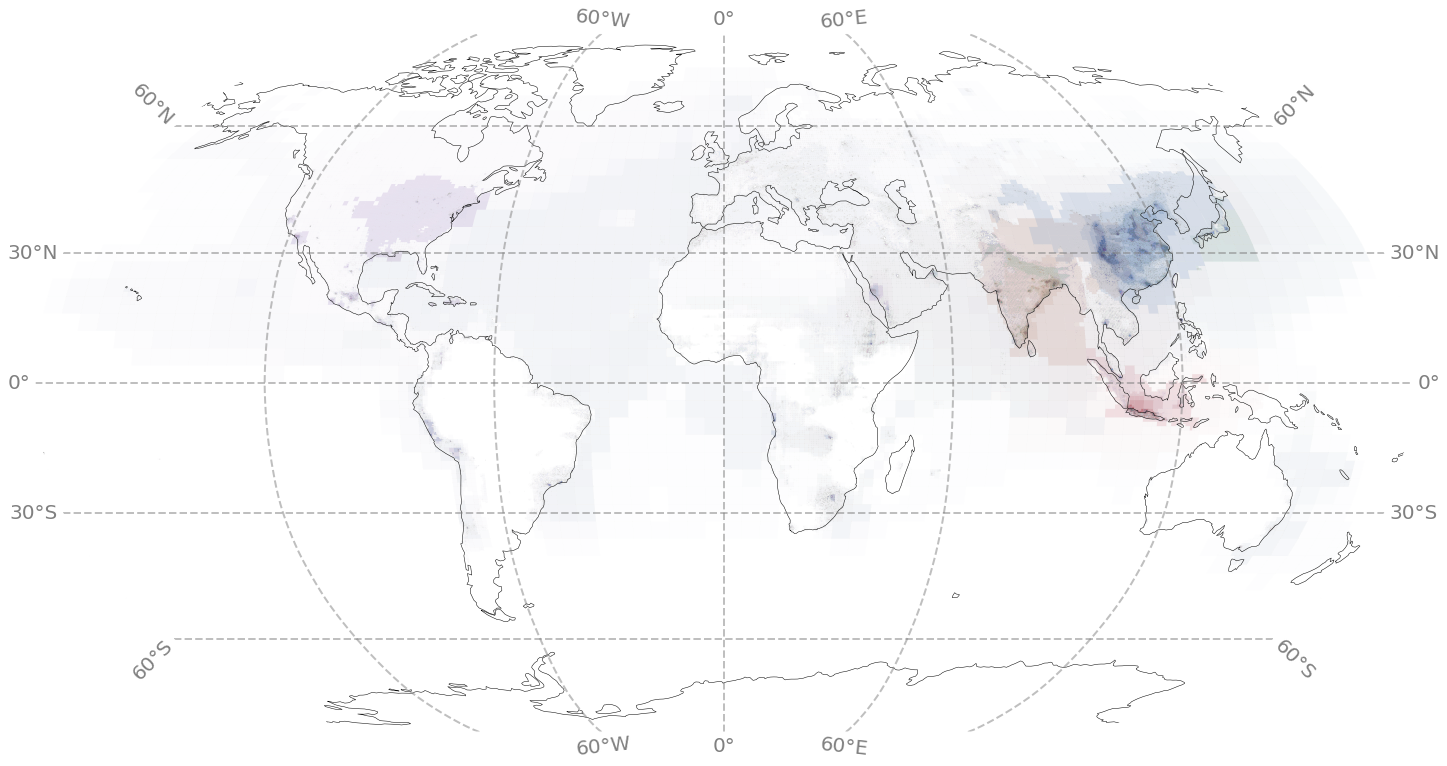

In [364]:
fig = plt.figure(figsize=(30, 10))


ax = plt.axes(projection=ccrs.Robinson())

robinson = ccrs.Robinson().proj4_init

# missing_kwds={
#         "color": "lightgrey",
#         "edgecolor": "grey",
#         "hatch": "///",
#         "label": "Missing values",
#     }

wholeworld.to_crs(robinson).plot(linewidths=0,column='JPN_con',ax=ax, vmin=0,vmax=1,cmap =cmap_JPNcon, norm=norm_JPNcon);

wholeworld.to_crs(robinson).plot(linewidths=0,column='IDN_con',ax=ax, vmin=0,vmax=1,cmap =cmap_IDNcon, norm=norm_IDNcon);

wholeworld.to_crs(robinson).plot(linewidths=0,column='USA_con',ax=ax, vmin=0,vmax=1,cmap =cmap_USAcon, norm=norm_USAcon);

wholeworld.to_crs(robinson).plot(linewidths=0,column='IND_con',ax=ax, vmin=0,vmax=1,cmap =cmap_INDcon, norm=norm_INDcon);

wholeworld.to_crs(robinson).plot(linewidths=0,column='CHN_con',ax=ax, vmin=0,vmax=1,cmap =cmap_CHNcon,  norm=norm_CHNcon);



plt.grid(visible=True,color='lightgrey')
plt.rcParams['axes.facecolor'] = 'white'

ax.axis()
# ax.set_xticks([-150,-100,-50,0,50,100,150])
ax.set_xlabel("longitude [degE]", visible="true",fontsize=20)
# ax.set_yticks([-75,-50,-25,0,25,50,75])
ax.set_ylabel("latitude [degN]", visible="true",fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabel_style = {'size': 20,'color':'gray'}
gl.ylabel_style = {'size': 20,'color':'gray'}
plt.tight_layout()
plt.show()

In [34]:
# fig, ax = plt.subplots(1, 1)
# wholeworld.plot(linewidths=0,column='CHN_con',ax=ax, vmin=0,vmax=1,cmap ='Reds',alpha=0.5,missing_kwds={
#         "color": "lightgrey",
#         "edgecolor": "grey",
#         "hatch": "///",
#         "label": "Missing values",
#     });

# wholeworld.plot(linewidths=0,column='USA_con',ax=ax, vmin=0,vmax=1,cmap ='Greens',alpha=0.5,missing_kwds={
#         "color": "lightgrey",
#         "edgecolor": "grey",
#         "hatch": "///",
#         "label": "Missing values",
#     });

# wholeworld.plot(linewidths=0,column='IND_con',ax=ax, vmin=0,vmax=1,cmap ='Blues',alpha=0.5,missing_kwds={
#         "color": "lightgrey",
#         "edgecolor": "grey",
#         "hatch": "///",
#         "label": "Missing values",
#     });


# wholeworld.plot(linewidths=0,column='JPN_con',ax=ax, vmin=0,vmax=1,cmap ='Purples',alpha=0.5,missing_kwds={
#         "color": "lightgrey",
#         "edgecolor": "grey",
#         "hatch": "///",
#         "label": "Missing values",
#     });

# wholeworld.plot(linewidths=0,column='VEN_con',ax=ax, vmin=0,vmax=1,cmap ='Greys',alpha=0.5,missing_kwds={
#         "color": "lightgrey",
#         "edgecolor": "grey",
#         "hatch": "///",
#         "label": "Missing values",
#     });

# ax.axis('off')
# plt.show()

# Method 2: percent of 99 percentile

## 10% 99 percentile, 20% 99 percentile.....99 percentile, 100 percentile.

## Production

In [53]:
max(list(wholeworld['CHN_pro']))

1203.1410755325176

In [294]:
cmap_CHNpro = ListedColormap(['#FFFFFF00','#f7fbff20','#deebf730','#c6dbef40','#9ecae150','#6baed660','#4292c670','#2171b580','#08459490'])
bounds_CHNpro = [0.1*np.percentile(list(wholeworld['CHN_pro']),99),0.2*np.percentile(list(wholeworld['CHN_pro']),99),0.3*np.percentile(list(wholeworld['CHN_pro']),99),
                 0.4*np.percentile(list(wholeworld['CHN_pro']),99),0.5*np.percentile(list(wholeworld['CHN_pro']),99),0.6*np.percentile(list(wholeworld['CHN_pro']),99),
        0.7*np.percentile(list(wholeworld['CHN_pro']),99),0.8*np.percentile(list(wholeworld['CHN_pro']),99),0.9*np.percentile(list(wholeworld['CHN_pro']),99),
        max(list(wholeworld['CHN_pro']))]
norm_CHNpro = BoundaryNorm(bounds_CHNpro, cmap_CHNpro.N)

In [295]:
bounds_CHNpro

[3.3302518671395847,
 6.660503734279169,
 9.990755601418753,
 13.321007468558339,
 16.651259335697922,
 19.981511202837506,
 23.31176306997709,
 26.642014937116677,
 29.97226680425626,
 240.83218072968785]

In [52]:
cmap_USApro = ListedColormap(['#FFFFFF00','#f7fcf520','#e5f5e030','#c7e9c040','#a1d99b50','#74c47660','#41ab5d70','#238b4580','#005a3290'])
bounds_USApro = [0.1*np.percentile(list(wholeworld['USA_pro']),99),0.2*np.percentile(list(wholeworld['USA_pro']),99),0.3*np.percentile(list(wholeworld['USA_pro']),99),
                 0.4*np.percentile(list(wholeworld['USA_pro']),99),0.5*np.percentile(list(wholeworld['USA_pro']),99),0.6*np.percentile(list(wholeworld['USA_pro']),99),
        0.7*np.percentile(list(wholeworld['USA_pro']),99),0.8*np.percentile(list(wholeworld['USA_pro']),99),0.9*np.percentile(list(wholeworld['USA_pro']),99),
        max(list(wholeworld['USA_pro']))]
norm_USApro = BoundaryNorm(bounds_USApro, cmap_USApro.N)

In [53]:
cmap_INDpro = ListedColormap(['#FFFFFF00','#fff5eb20','#fee6ce30','#fdd0a240','#fdae6b50','#fd8d3c60','#f1691370','#d9480180','#8c2d0490'])
bounds_INDpro = [0.1*np.percentile(list(wholeworld['IND_pro']),99),0.2*np.percentile(list(wholeworld['IND_pro']),99),0.3*np.percentile(list(wholeworld['IND_pro']),99),
                 0.4*np.percentile(list(wholeworld['IND_pro']),99),0.5*np.percentile(list(wholeworld['IND_pro']),99),0.6*np.percentile(list(wholeworld['IND_pro']),99),
        0.7*np.percentile(list(wholeworld['IND_pro']),99),0.8*np.percentile(list(wholeworld['IND_pro']),99),0.9*np.percentile(list(wholeworld['IND_pro']),99),
        max(list(wholeworld['IND_pro']))]
norm_INDpro = BoundaryNorm(bounds_INDpro, cmap_INDpro.N)

In [54]:
cmap_ROWpro = ListedColormap(['#FFFFFF00','#fcfbfd20','#efedf530','#dadaeb40','#bcbddc50','#9e9ac860','#807dba70','#6a51a380','#4a148690'])
bounds_ROWpro = [0.1*np.percentile(list(wholeworld['ROW_pro']),99),0.2*np.percentile(list(wholeworld['ROW_pro']),99),0.3*np.percentile(list(wholeworld['ROW_pro']),99),
                 0.4*np.percentile(list(wholeworld['ROW_pro']),99),0.5*np.percentile(list(wholeworld['ROW_pro']),99),0.6*np.percentile(list(wholeworld['ROW_pro']),99),
        0.7*np.percentile(list(wholeworld['ROW_pro']),99),0.8*np.percentile(list(wholeworld['ROW_pro']),99),0.9*np.percentile(list(wholeworld['ROW_pro']),99),
        max(list(wholeworld['ROW_pro']))]
norm_ROWpro = BoundaryNorm(bounds_ROWpro, cmap_ROWpro.N)

In [55]:
cmap_IDNpro = ListedColormap(['#FFFFFF00','#fff5f020','#fee0d230','#fcbba140','#fc927250','#fb6a4a60','#ef3b2c70','#cb181d80','#99000d90'])
bounds_IDNpro = [0.1*np.percentile(list(wholeworld['IDN_pro']),99),0.2*np.percentile(list(wholeworld['IDN_pro']),99),0.3*np.percentile(list(wholeworld['IDN_pro']),99),
                 0.4*np.percentile(list(wholeworld['IDN_pro']),99),0.5*np.percentile(list(wholeworld['IDN_pro']),99),0.6*np.percentile(list(wholeworld['IDN_pro']),99),
        0.7*np.percentile(list(wholeworld['IDN_pro']),99),0.8*np.percentile(list(wholeworld['IDN_pro']),99),0.9*np.percentile(list(wholeworld['IDN_pro']),99),
        max(list(wholeworld['IDN_pro']))]
norm_IDNpro = BoundaryNorm(bounds_IDNpro, cmap_IDNpro.N)

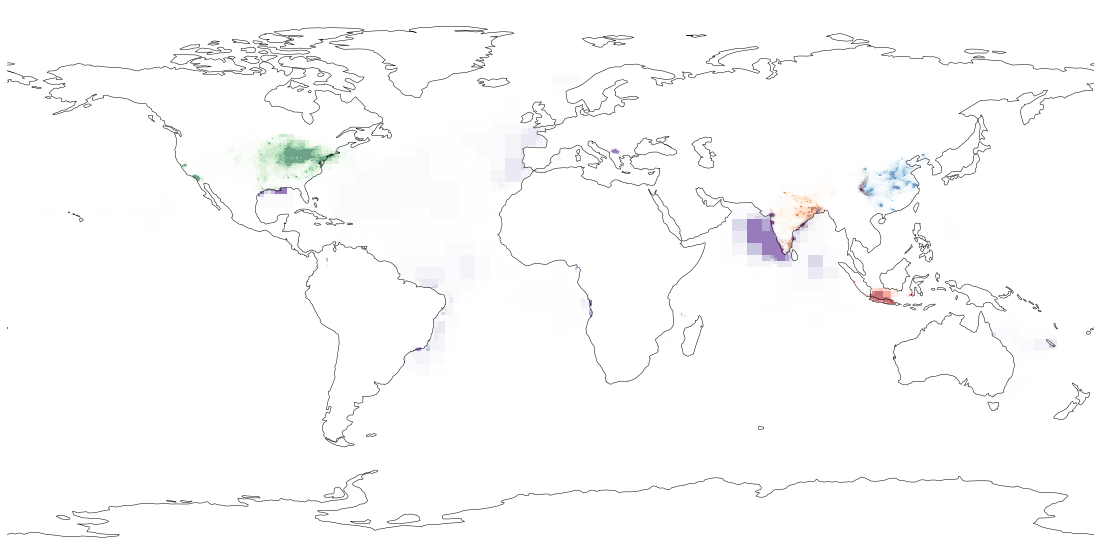

In [56]:
fig = plt.figure(figsize=(30, 10))

ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

wholeworld.plot(linewidths=0,column='USA_pro',ax=ax, vmin=0,vmax=1,cmap =cmap_USApro,  norm=norm_USApro, missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    });

wholeworld.plot(linewidths=0,column='CHN_pro',ax=ax, vmin=0,vmax=1,cmap =cmap_CHNpro,norm=norm_CHNpro, missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    });

wholeworld.plot(linewidths=0,column='IND_pro',ax=ax, vmin=0,vmax=1,cmap =cmap_INDpro, norm=norm_INDpro,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    });


wholeworld.plot(linewidths=0,column='ROW_pro',ax=ax, vmin=0,vmax=1,cmap =cmap_ROWpro, norm=norm_ROWpro,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    });

wholeworld.plot(linewidths=0,column='IDN_pro',ax=ax, vmin=0,vmax=1,cmap =cmap_IDNpro,norm=norm_IDNpro,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    });


ax.coastlines()

ax.axis('off')
plt.show()

## Consumption

In [57]:
cmap_CHNcon = ListedColormap(['#FFFFFF00','#f7fbff20','#deebf730','#c6dbef40','#9ecae150','#6baed660','#4292c670','#2171b580','#08459490'])
bounds_CHNcon = [0.1*np.percentile(list(wholeworld['CHN_con']),99),0.2*np.percentile(list(wholeworld['CHN_con']),99),0.3*np.percentile(list(wholeworld['CHN_con']),99),
                 0.4*np.percentile(list(wholeworld['CHN_con']),99),0.5*np.percentile(list(wholeworld['CHN_con']),99),0.6*np.percentile(list(wholeworld['CHN_con']),99),
        0.7*np.percentile(list(wholeworld['CHN_con']),99),0.8*np.percentile(list(wholeworld['CHN_con']),99),0.9*np.percentile(list(wholeworld['CHN_con']),99),
        max(list(wholeworld['CHN_con']))]
norm_CHNcon = BoundaryNorm(bounds_CHNcon, cmap_CHNcon.N)

In [58]:
cmap_INDcon = ListedColormap(['#FFFFFF00','#fff5eb20','#fee6ce30','#fdd0a240','#fdae6b50','#fd8d3c60','#f1691370','#d9480180','#8c2d0490'])
bounds_INDcon = [0.1*np.percentile(list(wholeworld['IND_con']),99),0.2*np.percentile(list(wholeworld['IND_con']),99),0.3*np.percentile(list(wholeworld['IND_con']),99),
                 0.4*np.percentile(list(wholeworld['IND_con']),99),0.5*np.percentile(list(wholeworld['IND_con']),99),0.6*np.percentile(list(wholeworld['IND_con']),99),
        0.7*np.percentile(list(wholeworld['IND_con']),99),0.8*np.percentile(list(wholeworld['IND_con']),99),0.9*np.percentile(list(wholeworld['IND_con']),99),
        max(list(wholeworld['IND_con']))]
norm_INDcon = BoundaryNorm(bounds_INDcon, cmap_INDcon.N)

In [59]:
cmap_USAcon = ListedColormap(['#FFFFFF00','#f7fcf520','#e5f5e030','#c7e9c040','#a1d99b50','#74c47660','#41ab5d70','#238b4580','#005a3290'])
bounds_USAcon = [0.1*np.percentile(list(wholeworld['USA_con']),99),0.2*np.percentile(list(wholeworld['USA_con']),99),0.3*np.percentile(list(wholeworld['USA_con']),99),
                 0.4*np.percentile(list(wholeworld['USA_con']),99),0.5*np.percentile(list(wholeworld['USA_con']),99),0.6*np.percentile(list(wholeworld['USA_con']),99),
        0.7*np.percentile(list(wholeworld['USA_con']),99),0.8*np.percentile(list(wholeworld['USA_con']),99),0.9*np.percentile(list(wholeworld['USA_con']),99),
        max(list(wholeworld['USA_con']))]
norm_USAcon = BoundaryNorm(bounds_USAcon, cmap_USAcon.N)

In [60]:
cmap_JPNcon = ListedColormap(['#FFFFFF00','#fcfbfd20','#efedf530','#dadaeb40','#bcbddc50','#9e9ac860','#807dba70','#6a51a380','#4a148690'])
bounds_JPNcon = [0.1*np.percentile(list(wholeworld['JPN_con']),99),0.2*np.percentile(list(wholeworld['JPN_con']),99),0.3*np.percentile(list(wholeworld['JPN_con']),99),
                 0.4*np.percentile(list(wholeworld['JPN_con']),99),0.5*np.percentile(list(wholeworld['JPN_con']),99),0.6*np.percentile(list(wholeworld['JPN_con']),99),
        0.7*np.percentile(list(wholeworld['JPN_con']),99),0.8*np.percentile(list(wholeworld['JPN_con']),99),0.9*np.percentile(list(wholeworld['JPN_con']),99),
        max(list(wholeworld['JPN_con']))]
norm_JPNcon = BoundaryNorm(bounds_JPNcon, cmap_JPNcon.N)

In [62]:
cmap_IDNcon = ListedColormap(['#FFFFFF00','#fff5f020','#fee0d230','#fcbba140','#fc927250','#fb6a4a60','#ef3b2c70','#cb181d80','#99000d90'])
bounds_IDNcon = [0.1*np.percentile(list(wholeworld['IDN_con']),99),0.2*np.percentile(list(wholeworld['IDN_con']),99),0.3*np.percentile(list(wholeworld['IDN_con']),99),
                 0.4*np.percentile(list(wholeworld['IDN_con']),99),0.5*np.percentile(list(wholeworld['IDN_con']),99),0.6*np.percentile(list(wholeworld['IDN_con']),99),
        0.7*np.percentile(list(wholeworld['IDN_con']),99),0.8*np.percentile(list(wholeworld['IDN_con']),99),0.9*np.percentile(list(wholeworld['IDN_con']),99),
        max(list(wholeworld['IDN_con']))]
norm_IDNcon = BoundaryNorm(bounds_IDNcon, cmap_IDNcon.N)

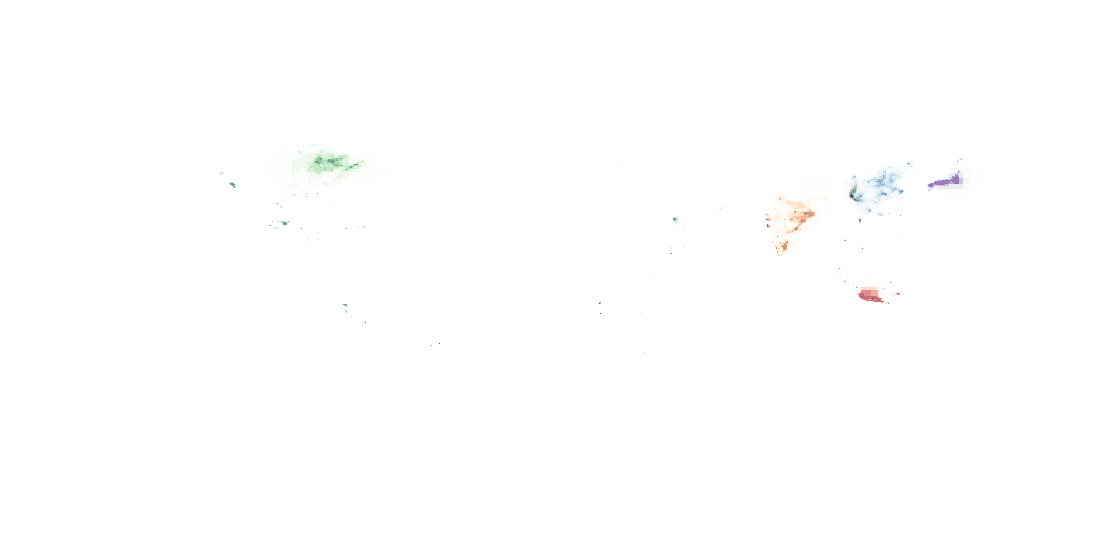

In [63]:
fig, ax = plt.subplots(1, 1)

wholeworld.plot(linewidths=0,column='CHN_con',ax=ax, vmin=0,vmax=1,cmap =cmap_CHNcon,  norm=norm_CHNcon, missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    });

wholeworld.plot(linewidths=0,column='IND_con',ax=ax, vmin=0,vmax=1,cmap =cmap_INDcon, norm=norm_INDcon, missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    });

wholeworld.plot(linewidths=0,column='USA_con',ax=ax, vmin=0,vmax=1,cmap =cmap_USAcon, norm=norm_USAcon,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    });


wholeworld.plot(linewidths=0,column='JPN_con',ax=ax, vmin=0,vmax=1,cmap =cmap_JPNcon, norm=norm_JPNcon,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    });

wholeworld.plot(linewidths=0,column='IDN_con',ax=ax, vmin=0,vmax=1,cmap =cmap_IDNcon, norm=norm_IDNcon,missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",
    });




ax.axis('off')
plt.show()